# EDA1 -  Customer Service (CS) Insight Analyst

This notebook documents the initial step of exploratory data analysis (EDA), focusing on analyzing individual columns (and stratified data where relevant) to gain a deeper understanding of the dataset's structure and the underlying business processes.

This step aims to inform subsequent analyses and guide decision-making for future actions. Additionally, the coding effort in this phase serves as a foundation for the next stages, not only facilitating further data exploration but also setting up the framework for modeling and advanced analyses.

## Configuration and setup

In [1]:
# Import standard modules
import logging

# Import local modules
import common
import analysis

# Set variables
DB_FILE = common.obtain_root_path() / "data" / "etraveli.db"
LIMITS = None#(28800, 63000) # Use `None` to disable limits
LOGGING_LEVEL = logging.INFO

# Configure logging
logging.basicConfig(format="[EDA1 %(asctime)s] - %(message)s", level=LOGGING_LEVEL)

### Data

The prepared data is loaded into an SQLite database, with column names normalized for consistency and the number of errands per order pre-computed. This pre-computation is feasible here because the data is static; in a production environment, this metric would ideally be updated dynamically—either in real time or via a batch job—and stored in a separate table for efficiency.

While loading data from SQLite is slower than directly using a Parquet file (especially with performance-optimized libraries like `pyarrow`), this approach offers significant advantages during development. SQLite provides greater flexibility for manual data exploration and aligns more closely with the typical production environment, where an SQL database is likely the primary data source.

In [2]:
# Load data
errands_df, orders_df = common.load_data(DB_FILE, LIMITS)

# Column transformations
errands_df['is_test_errand'] = errands_df['is_test_errand'].astype(bool)
errands_df['order_id'] = errands_df['order_id'].astype(str)
orders_df['is_changed'] = orders_df['is_changed'].astype(bool)
orders_df['is_canceled'] = orders_df['is_canceled'].astype(bool)

# Filter out test errands
errands_df = errands_df[~errands_df['is_test_errand']]

# Print data shapes
logging.info(f"Errands dataframe shape: {errands_df.shape}")
logging.info(f"Orders dataframe shape: {orders_df.shape}")

[EDA1 2024-12-22 16:14:35,233] - Errands dataframe shape: (2680892, 8)
[EDA1 2024-12-22 16:14:35,264] - Orders dataframe shape: (6300206, 22)


The `errands` dataset contains 2,885,296 rows, and the `orders` dataset contains 6,300,206 rows. These counts were manually verified against the original Parquet files to ensure no data was lost during the conversion process.

Initial inspection reveals that the database requires some cleaning. For instance, the errand_action column includes inconsistent formatting, such as mixed usage of commas, colons, and dots, with cases like both `"3. Refunds"` and `"3: Refunds"` (dot vs. colon).

To begin the analysis, I focus on examining the datasets column by column (independently, without considering interactions). This step is crucial for understanding both the data's structure and the business processes it represents.

## Errands dataset

Some key observations from initial analysis:

- Errands vs. Orders:
 - The number of errands corresponds to approximately 50% of the total number of orders, though the distribution is highly skewed.
  - Only 16% of orders have at least one associated errand. To account for 80% of all errands, approximately half a million orders (those with the highest errand counts) are needed.
  - Outliers include some complex cases, such as orders with over 100 errands, with the maximum being 243 errands linked to a single order.
- Errand Categories:
  - As expected, most contacts fall into five main categories: "cancellation or refund," "rebooking," "schedule change," "document and travel info," and "changes to name and passenger info." Together, these categories represent over 80% of all errands, with "cancellation or refund" and "rebooking" alone comprising roughly half.
- Errand Actions:
  - The variety of errand actions is extremely diverse. Any meaningful insights about this variable require examining its correlation with other features to uncover patterns.
- Communication Channels:
  - Chat and phone dominate as the primary channels for customer contact, accounting for approximately three-quarters of all cases.
- Stratified Analysis of Errand Categories:
  - Payment-Related Errands: Over 50% pertain to invoice-related questions, while other issues such as pricing concerns, double charges, or reserved amounts make up the remainder.
  - Other Services: Although general assistance is the most common reason, nearly half of these errands involve airline services, add-on products, or meal-related inquiries.
  - Cancellations: Almost 70% of cancellation-related errands are requests for information, while 22% concern cancellations that have already been processed (likely unknown to the customer).
  - Rebooking: A significant proportion (three-quarters) of rebooking errands are due to non-flexible tickets.
  - Seating Questions: Nearly 90% of seating-related inquiries involve "Seating light / seat map."
  - Claim Forms: This category exhibits a high Gini coefficient, indicating a wide variety of claims with no single dominant pattern when analyzed in isolation.

### Analysis

### Dataset Summary

- Total Rows: 2680892

- Total Columns: 8


| Column Name     | Type           | Excluded   | Dependent   |
|:----------------|:---------------|:-----------|:------------|
| order_id        | object         | False      | False       |
| errand_id       | int64          | True       | False       |
| created         | datetime64[ns] | False      | False       |
| errand_category | object         | False      | False       |
| errand_type     | object         | False      | True        |
| errand_action   | object         | False      | False       |
| errand_channel  | object         | False      | False       |
| is_test_errand  | bool           | False      | False       |

#### Numerical Summary

|         |       count | mean                          | min                 | 25%                 | 50%                        | 75%                           | max                 |
|:--------|------------:|:------------------------------|:--------------------|:--------------------|:---------------------------|:------------------------------|:--------------------|
| created | 2.68089e+06 | 2024-04-11 12:31:08.389840640 | 2023-12-31 08:59:49 | 2024-02-20 22:45:20 | 2024-03-25 04:02:00.500000 | 2024-05-15 14:31:14.249999872 | 2024-12-19 00:06:21 |



[EDA1 2024-12-22 16:14:38,260] - Processing categorical column: order_id


#### Column: order_id

- **Unique Categories:** 1024728

- **Gini Coefficient:** 1.0

- **Top Categories (abs/rel):** 512527 / 0.5002



| Category   | Count   | Ratio   |
|:-----------|:--------|:--------|
| 4600855684 | 234     | 0.0001  |
| 4602833735 | 191     | 0.0001  |
| 4618562139 | 174     | 0.0001  |
| 4610275997 | 172     | 0.0001  |
| 4613059098 | 171     | 0.0001  |
| ...        | ...     | ...     |
| 4607747310 | 1       | 0.0     |
| 4607745185 | 1       | 0.0     |
| 4607745449 | 1       | 0.0     |
| 4607745151 | 1       | 0.0     |
| 4607745766 | 1       | 0.0     |



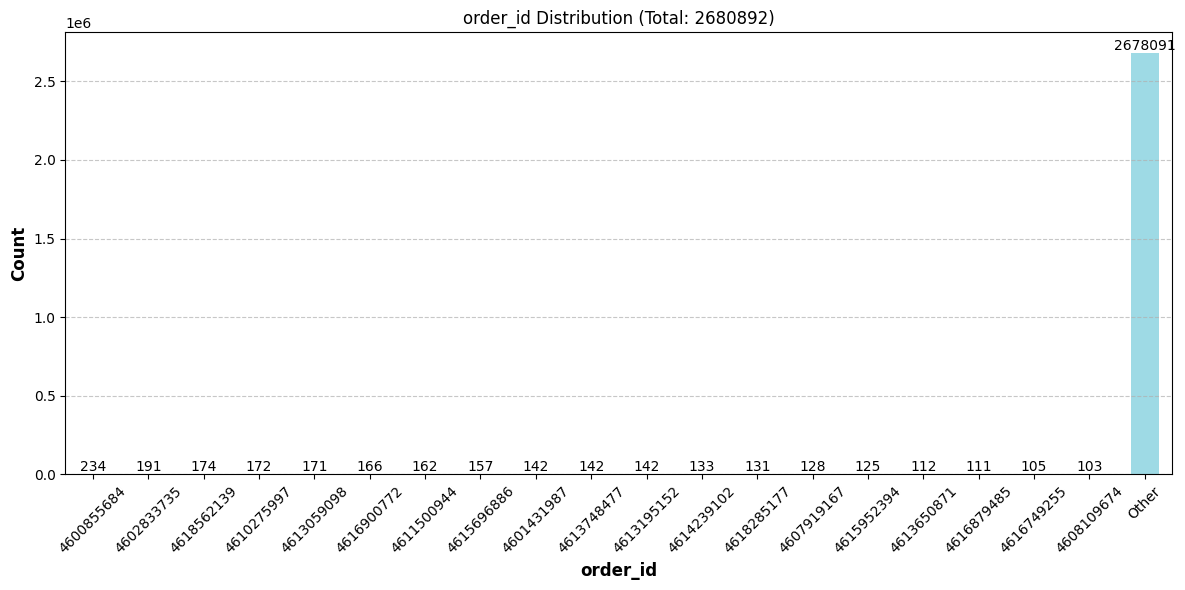

[EDA1 2024-12-22 16:14:42,164] - Processing categorical column: errand_category


#### Column: errand_category

- **Unique Categories:** 45

- **Gini Coefficient:** 0.833

- **Top Categories (abs/rel):** 5 / 0.1111



| Category                           | Count   | Ratio   |
|:-----------------------------------|:--------|:--------|
| 2: Cancellation / refund           | 650659  | 0.2427  |
| 1: Rebooking                       | 624523  | 0.233   |
| 18: Schedule change                | 457044  | 0.1705  |
| 5: Document & travel info          | 324104  | 0.1209  |
| 4: Change of name & passenger info | 176551  | 0.0659  |
| ...                                | ...     | ...     |
| 56: Fraud EAPI List ONLY           | 3       | 0.0     |
| 45: FL Coordinators                | 2       | 0.0     |
| 55: Manual Booking                 | 1       | 0.0     |
| 15: CT UPA                         | 1       | 0.0     |
| 48: Strategic Partners Team        | 1       | 0.0     |



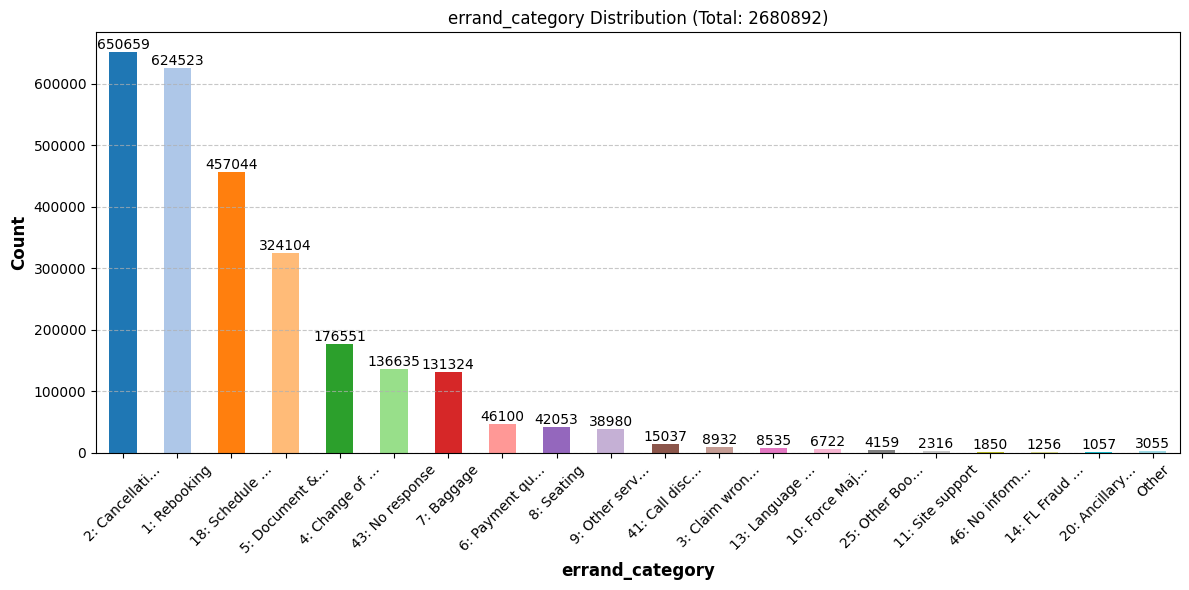

[EDA1 2024-12-22 16:14:43,227] - Processing categorical column: errand_action


#### Column: errand_action

- **Unique Categories:** 384

- **Gini Coefficient:** 0.9559

- **Top Categories (abs/rel):** 26 / 0.0677



| Category                                         | Count   | Ratio   |
|:-------------------------------------------------|:--------|:--------|
| 3: No change made                                | 361853  | 0.135   |
| 1: Info provided                                 | 190386  | 0.071   |
| 3: Not cxnl reservation                          | 186354  | 0.0695  |
| 1: Chat disconnected                             | 136635  | 0.051   |
| 1: Cnxl reservation                              | 120750  | 0.045   |
| ...                                              | ...     | ...     |
| 3: LCC claim                                     | 1       | 0.0     |
| 5: GDS claim                                     | 1       | 0.0     |
| 7: Waiting reply                                 | 1       | 0.0     |
| 3: VC Dispute Lost                               | 1       | 0.0     |
| 12: FL follow up with customer/supplier /partner | 1       | 0.0     |



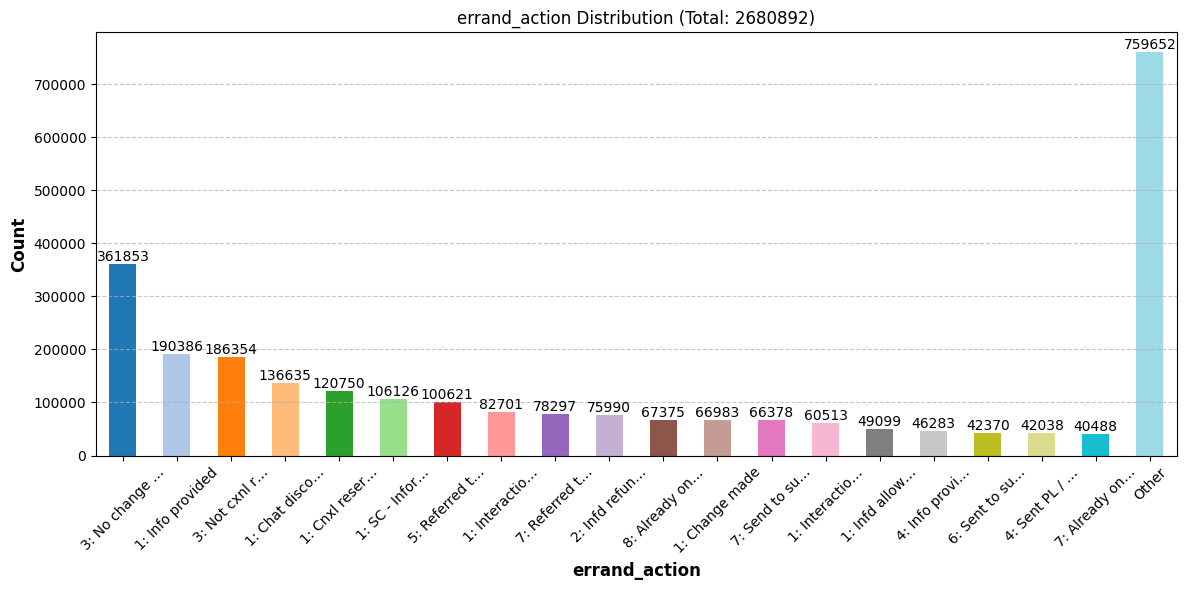

[EDA1 2024-12-22 16:14:44,098] - Processing categorical column: errand_channel


#### Column: errand_channel

- **Unique Categories:** 6

- **Gini Coefficient:** 0.6916

- **Top Categories (abs/rel):** 3 / 0.5



| Category        |   Count |   Ratio |
|:----------------|--------:|--------:|
| 19: Chat        | 1170684 |  0.4367 |
| 1: Phone In     |  850534 |  0.3173 |
| 2: Mail In      |  220021 |  0.0821 |
| 34: SC Phone in |  188015 |  0.0701 |
| 39: SC Chat     |  187006 |  0.0698 |
| 35: SC Mail In  |   64632 |  0.0241 |



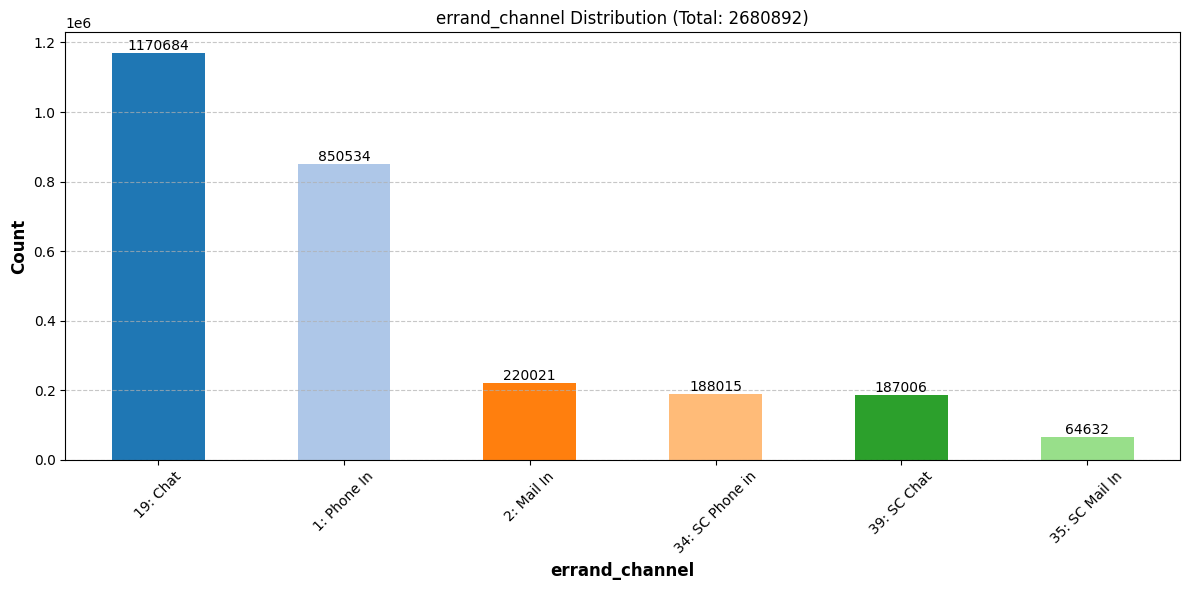

[EDA1 2024-12-22 16:14:44,699] - Processing dependency: (errand_category, errand_type)


#### Combined Analysis: (errand_category, errand_type)

- **Unique Categories:** 257

- **Gini Coefficient:** 0.9173

- **Top Categories (abs/rel):** 13 / 0.0506



| Category                                                | Count   | Ratio   |
|:--------------------------------------------------------|:--------|:--------|
| ('1: Rebooking', '1: No Flexible Ticket')               | 459075  | 0.1712  |
| ('2: Cancellation / refund', '1: Ask about cxnl rules') | 450383  | 0.168   |
| ('18: Schedule change', '2: We have inf. about SC')     | 227403  | 0.0848  |
| ('2: Cancellation / refund', '2: Already cxnl')         | 145943  | 0.0544  |
| ('43: No response', '1. Customer not reached')          | 136635  | 0.051   |
| ...                                                     | ...     | ...     |
| ('2: Cancellation / refund', '14: Lock Your Price')     | 1       | 0.0     |
| ('34: Backend BOM', '33: Cancellation Guarantee')       | 1       | 0.0     |
| ('44: Payouts & Accounting', '3. FM')                   | 1       | 0.0     |
| ('10: Force Majeure', '6: Self Service Rebooking')      | 1       | 0.0     |
| ('18: Schedule change', '21: Supervisor Call')          | 1       | 0.0     |



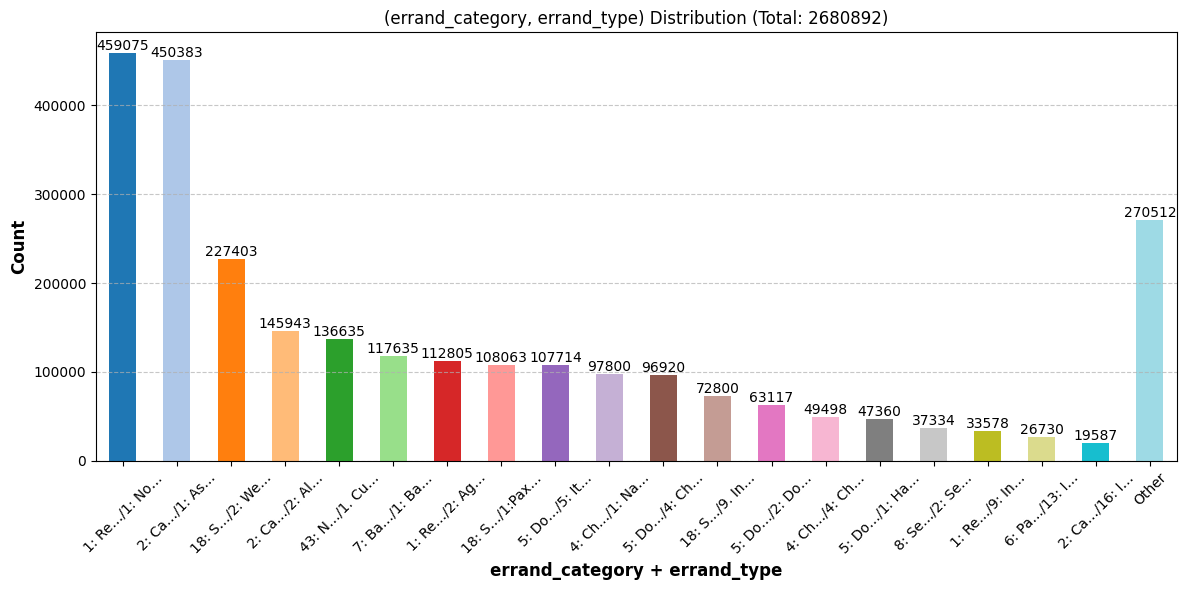

#### Stratified Analysis: errand_type by errand_category


#### errand_category = 6: Payment questions

- **Unique Categories:** 17

- **Gini Coefficient:** 0.6217

- **Top Categories (abs/rel):** 3 / 0.1765



| Category                                                  | Count   | Ratio   |
|:----------------------------------------------------------|:--------|:--------|
| 13: Invoice                                               | 26730   | 0.5798  |
| 1: Price                                                  | 8259    | 0.1792  |
| 6: No order but charged / charged twice / reserved amount | 2862    | 0.0621  |
| 2: Payment not conf - CC                                  | 2716    | 0.0589  |
| 4: Payment fee / discount                                 | 1448    | 0.0314  |
| ...                                                       | ...     | ...     |
| 18. Incorrect department                                  | 48      | 0.001   |
| 14: Call transfer/Callback (SOD/TL/Manager)               | 41      | 0.0009  |
| 12: PSD2 - Other error                                    | 17      | 0.0004  |
| 10: PSD2 - Code problem                                   | 6       | 0.0001  |
| 19: Escalation Booking.com                                | 1       | 0.0     |



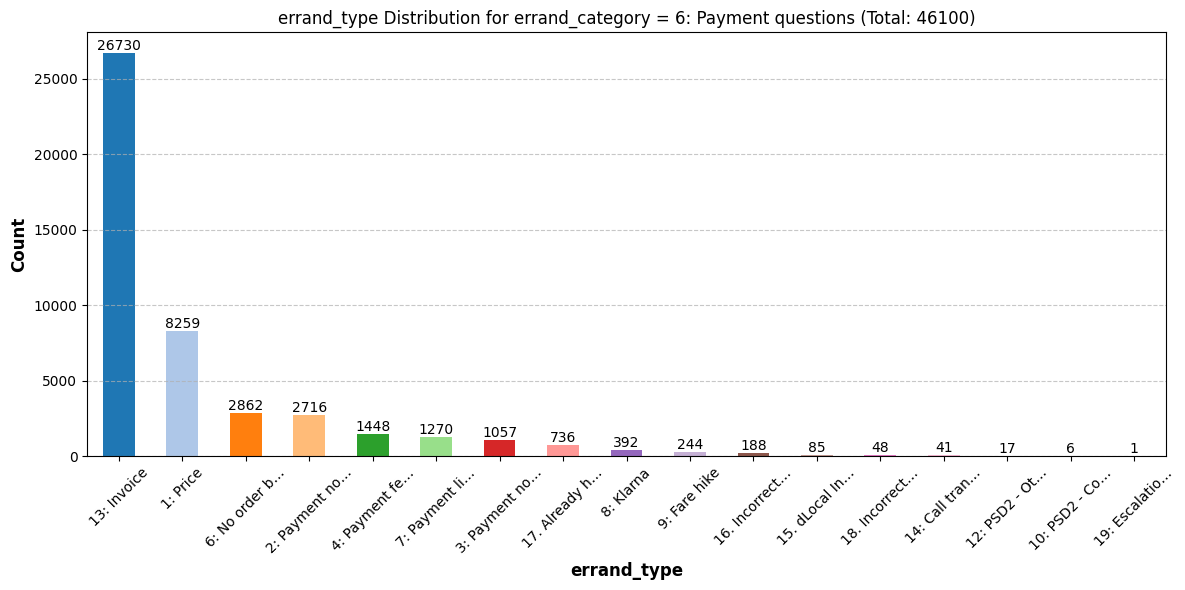

#### errand_category = 9: Other services / products

- **Unique Categories:** 11

- **Gini Coefficient:** 0.7447

- **Top Categories (abs/rel):** 4 / 0.3636



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 1: Assistance                              |   15547 |  0.3988 |
| 3: Other airline services                  |    8474 |  0.2174 |
| 4: Other add on products                   |    7125 |  0.1828 |
| 2: Meals                                   |    4543 |  0.1165 |
| 9: Already handled                         |    1098 |  0.0282 |
| 8: Incorrect department-SC                 |     951 |  0.0244 |
| 6: Check-in questions                      |     897 |  0.023  |
| 10: Incorrect department                   |     268 |  0.0069 |
| 5: Call transfer/Callback (SOD/TL/Manager) |      54 |  0.0014 |
| 11: Airhelp Core                           |      16 |  0.0004 |
| 7: Fast Track                              |       7 |  0.0002 |



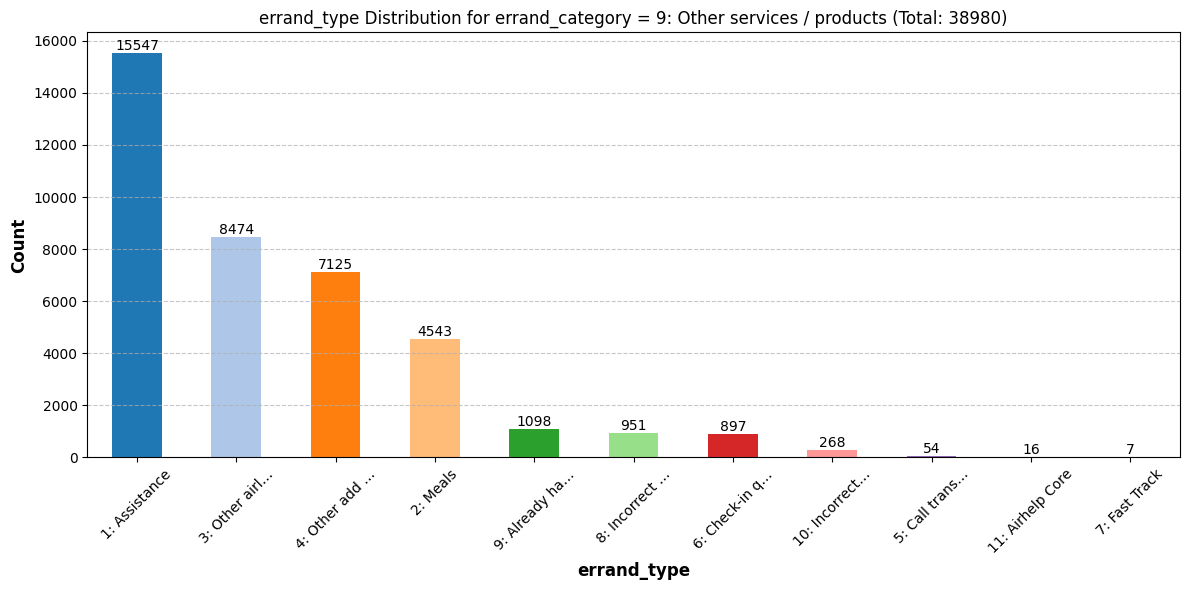

#### errand_category = 2: Cancellation / refund

- **Unique Categories:** 19

- **Gini Coefficient:** 0.4687

- **Top Categories (abs/rel):** 2 / 0.1053



| Category                        | Count   | Ratio   |
|:--------------------------------|:--------|:--------|
| 1: Ask about cxnl rules         | 450383  | 0.6922  |
| 2: Already cxnl                 | 145943  | 0.2243  |
| 16: Incorrect department-SC     | 19587   | 0.0301  |
| 17: Already handled             | 16516   | 0.0254  |
| 18: Incorrect department        | 9005    | 0.0138  |
| ...                             | ...     | ...     |
| 21: Escalation Customer Contact | 2       | 0.0     |
| 14: Lock Your Price             | 1       | 0.0     |
| 23: Escalation Supplier contact | 1       | 0.0     |
| 29: Supervisor Call             | 1       | 0.0     |
| 22: Escalation ETG Management   | 1       | 0.0     |



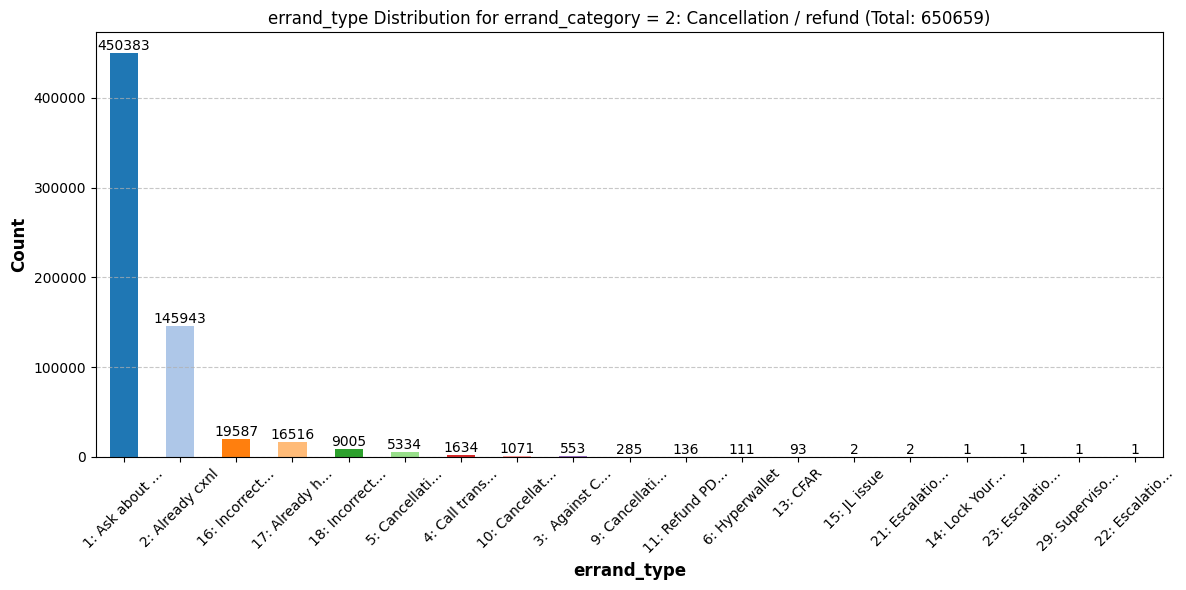

#### errand_category = 5: Document & travel info

- **Unique Categories:** 10

- **Gini Coefficient:** 0.7406

- **Top Categories (abs/rel):** 3 / 0.3



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 5: Itinerary questions                     |  107714 |  0.3323 |
| 4: Check-in questions                      |   96920 |  0.299  |
| 2: Document questions                      |   63117 |  0.1947 |
| 1: Have no document                        |   47360 |  0.1461 |
| 8: Already handled                         |    3668 |  0.0113 |
| 7: Incorrect department-SC                 |    2226 |  0.0069 |
| 9: Incorrect department                    |    1617 |  0.005  |
| 3: Pax at airport                          |    1286 |  0.004  |
| 6. Call transfer/Callback (SOD/TL/Manager) |     195 |  0.0006 |
| 16: ETG Escalation SC Customer Contact     |       1 |  0      |



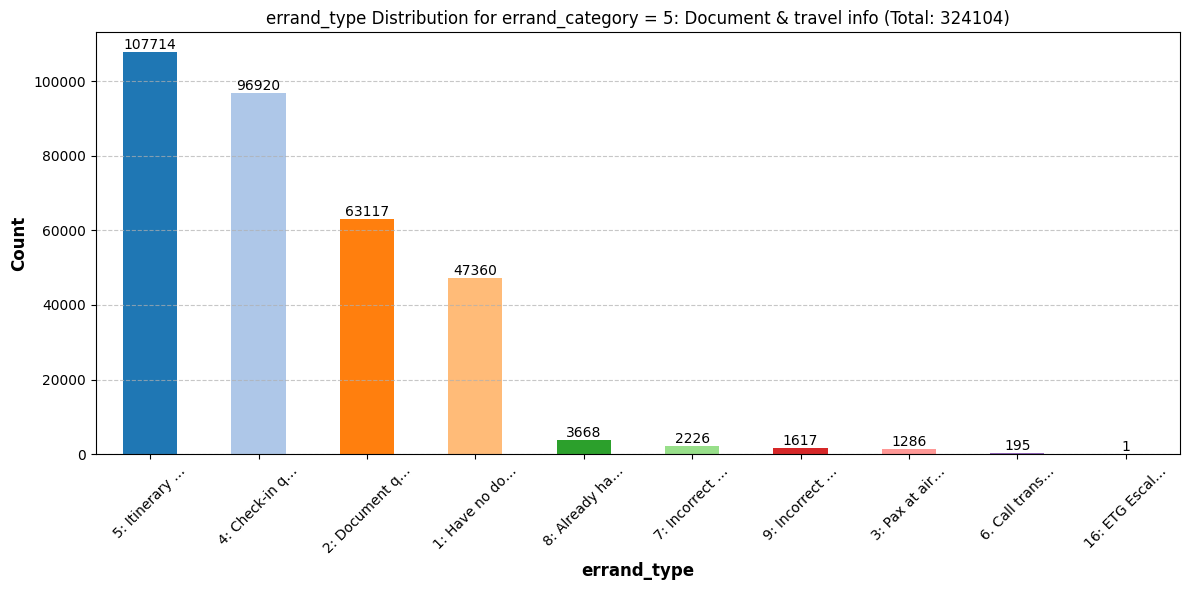

#### errand_category = 1: Rebooking

- **Unique Categories:** 9

- **Gini Coefficient:** 0.4237

- **Top Categories (abs/rel):** 2 / 0.2222



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 1: No Flexible Ticket                      |  459075 |  0.7351 |
| 2: Against Flexible Ticket                 |  112805 |  0.1806 |
| 9: Incorrect department-SC                 |   33578 |  0.0538 |
| 11: Incorrect department                   |   10989 |  0.0176 |
| 10: Already handled                        |    7015 |  0.0112 |
| 7: Call transfer/Callback (SOD/TL/Manager) |     769 |  0.0012 |
| 4: Against flexible ticket added manually  |     128 |  0.0002 |
| 6: Against Connection Guarantee            |     120 |  0.0002 |
| 5: Self Service Rebooking                  |      44 |  0.0001 |



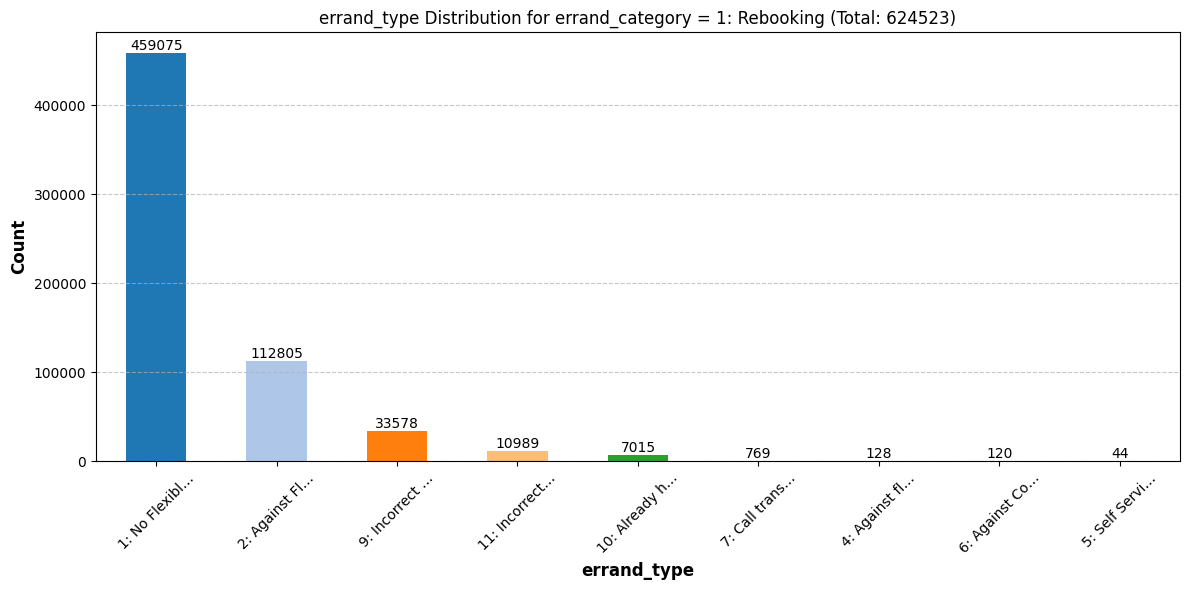

#### errand_category = 43: No response

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category                |   Count |   Ratio |
|:------------------------|--------:|--------:|
| 1. Customer not reached |  136635 |       1 |



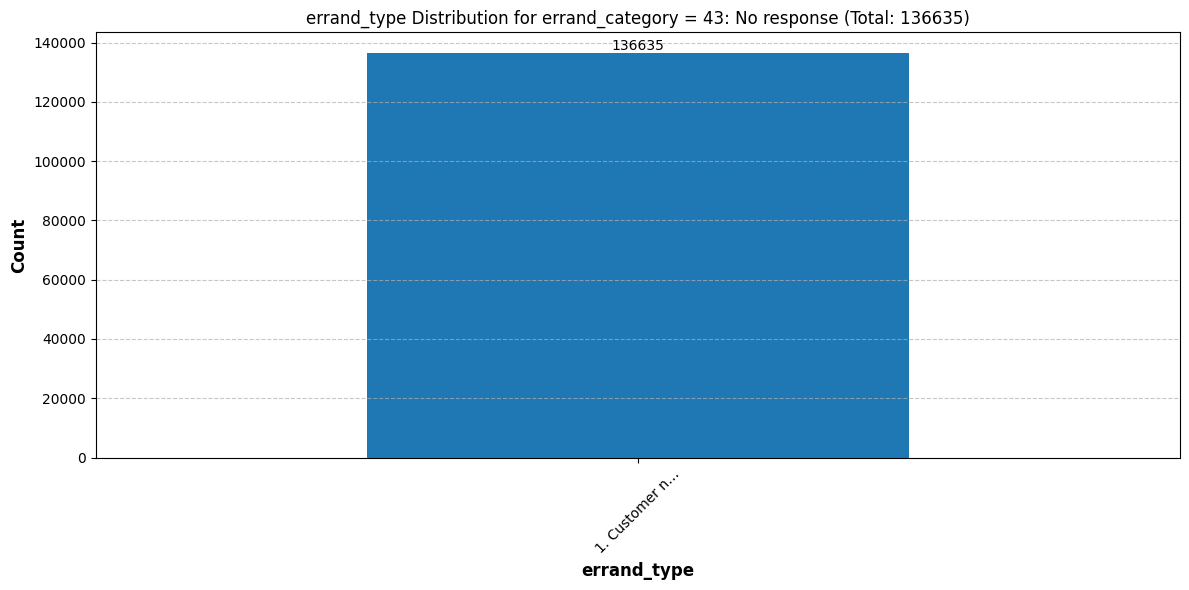

#### errand_category = 7: Baggage

- **Unique Categories:** 8

- **Gini Coefficient:** 0.1939

- **Top Categories (abs/rel):** 1 / 0.125



| Category                                    |   Count |   Ratio |
|:--------------------------------------------|--------:|--------:|
| 1: Baggage information                      |  117635 |  0.8958 |
| 2: Baggage claim                            |    6929 |  0.0528 |
| 3: Baggage refund                           |    3299 |  0.0251 |
| 6: Incorrect department-SC                  |    1564 |  0.0119 |
| 7. Already handled                          |    1513 |  0.0115 |
| 8. Incorrect department                     |     246 |  0.0019 |
| 4 : Call transfer/Callback (SOD/TL/Manager) |     106 |  0.0008 |
| 5: Receipt reviewed                         |      32 |  0.0002 |



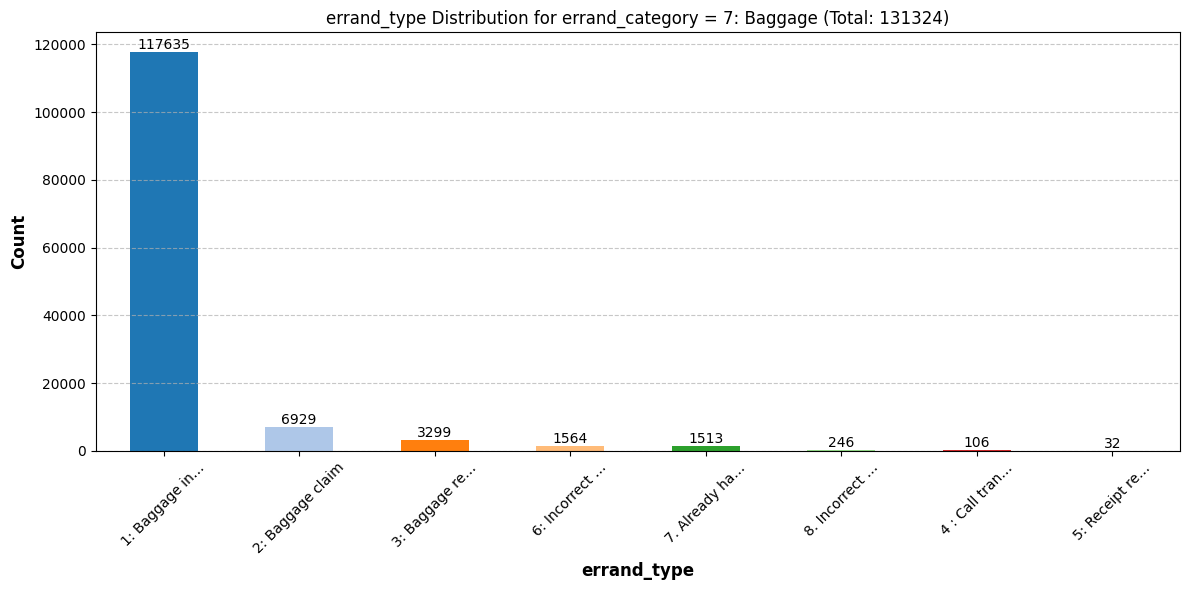

#### errand_category = 4: Change of name & passenger info

- **Unique Categories:** 8

- **Gini Coefficient:** 0.6041

- **Top Categories (abs/rel):** 2 / 0.25



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 1: Name correction                         |   97800 |  0.5539 |
| 4: Change customer information             |   49498 |  0.2804 |
| 2: Change passenger                        |   15535 |  0.088  |
| 3: Add passenger                           |    8478 |  0.048  |
| 7: Already handled                         |    3230 |  0.0183 |
| 9: Incorrect department SC                 |    1460 |  0.0083 |
| 8: Incorrect department                    |     360 |  0.002  |
| 6: Call transfer/Callback (SOD/TL/Manager) |     190 |  0.0011 |



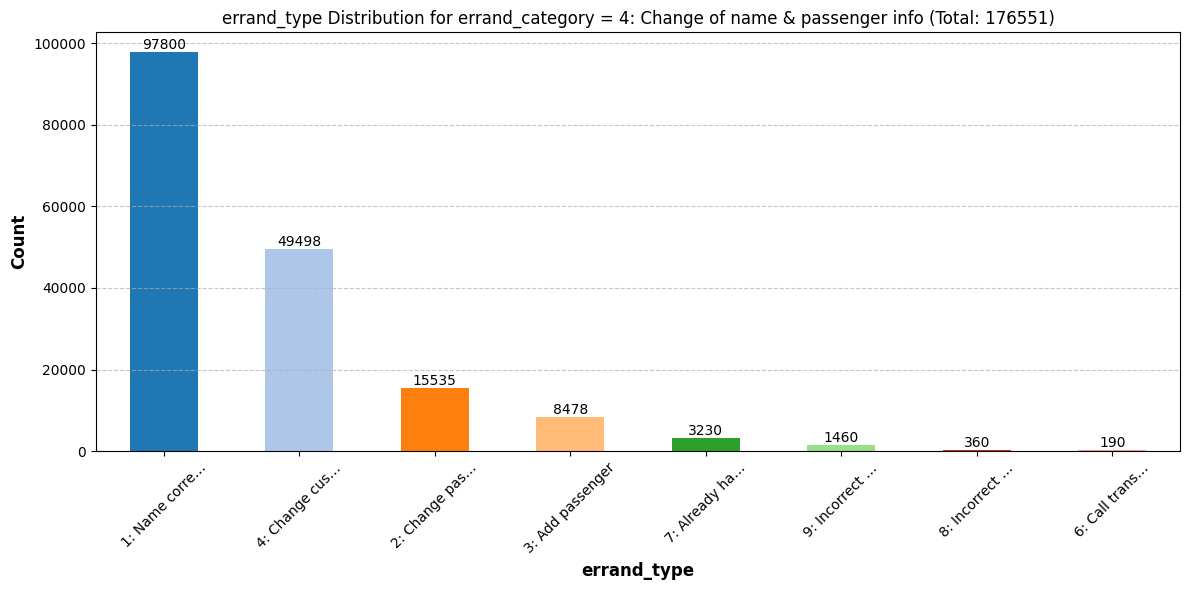

#### errand_category = 8: Seating

- **Unique Categories:** 7

- **Gini Coefficient:** 0.2066

- **Top Categories (abs/rel):** 1 / 0.1429



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 2: Seating light / seat map                |   37334 |  0.8878 |
| 4: Seating Claim                           |    2799 |  0.0666 |
| 5: Incorrect department-SC                 |     979 |  0.0233 |
| 6: Already handled                         |     727 |  0.0173 |
| 7: Incorrect department                    |     162 |  0.0039 |
| 3: Call transfer/Callback (SOD/TL/Manager) |      49 |  0.0012 |
| 8: Escalation Booking.com                  |       3 |  0.0001 |



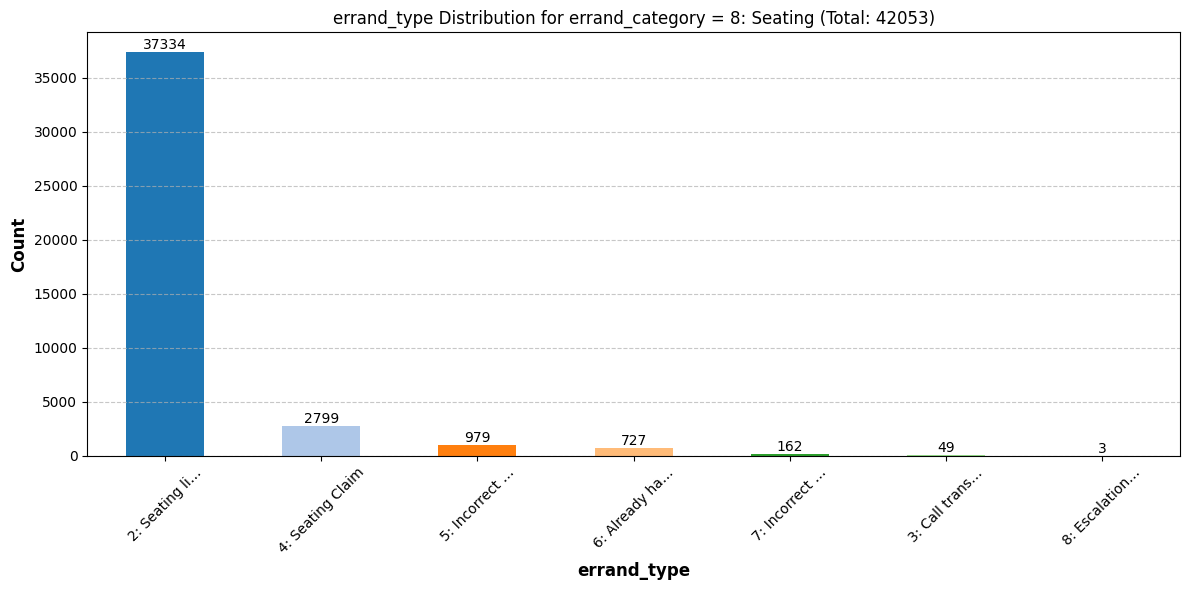

#### errand_category = 18: Schedule change

- **Unique Categories:** 10

- **Gini Coefficient:** 0.668

- **Top Categories (abs/rel):** 3 / 0.3



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 2: We have inf. about SC                   |  227403 |  0.4976 |
| 1:Pax has discovered sc by themselves      |  108063 |  0.2364 |
| 9. Incorrect department                    |   72800 |  0.1593 |
| 5: Against Connection Guarantee            |   16347 |  0.0358 |
| 7. Incorrect department-SC                 |   14787 |  0.0324 |
| 6: Already handled SC                      |   12914 |  0.0283 |
| 4 :Call transfer/Callback (SOD/TL/Manager) |    2680 |  0.0059 |
| 8. Already handled                         |    2030 |  0.0044 |
| 10: Escalation from other department       |      19 |  0      |
| 21: Supervisor Call                        |       1 |  0      |



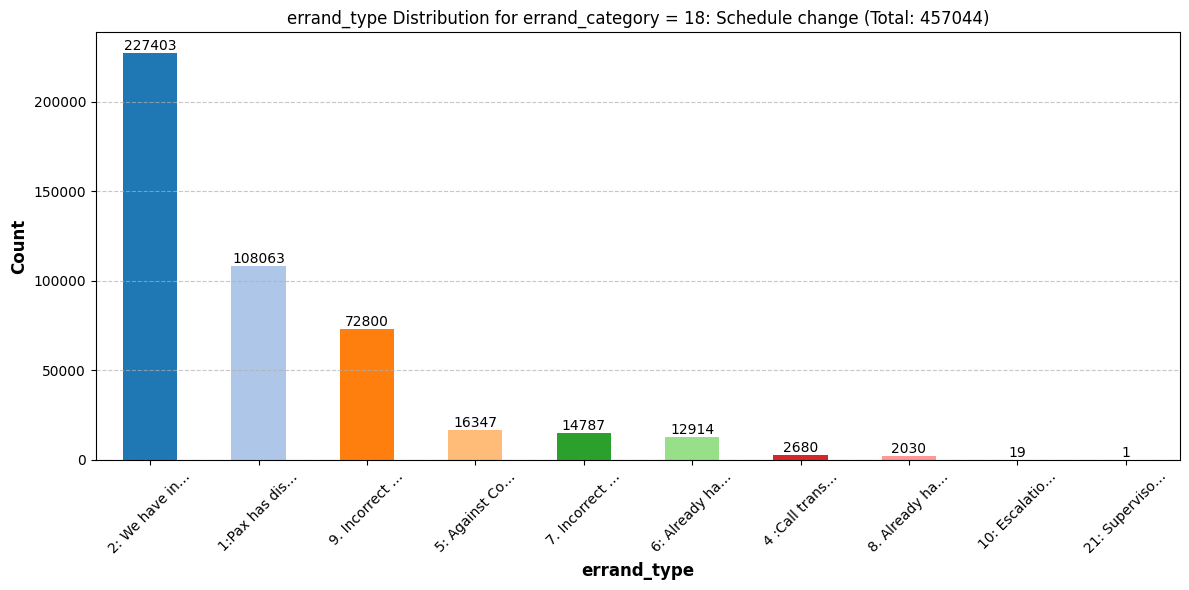

#### errand_category = 41: Call disconnected

- **Unique Categories:** 2

- **Gini Coefficient:** 0.0301

- **Top Categories (abs/rel):** 1 / 0.5



| Category                     |   Count |   Ratio |
|:-----------------------------|--------:|--------:|
| 1: Customer not reached      |   14807 |  0.9847 |
| 4: No phone number available |     230 |  0.0153 |



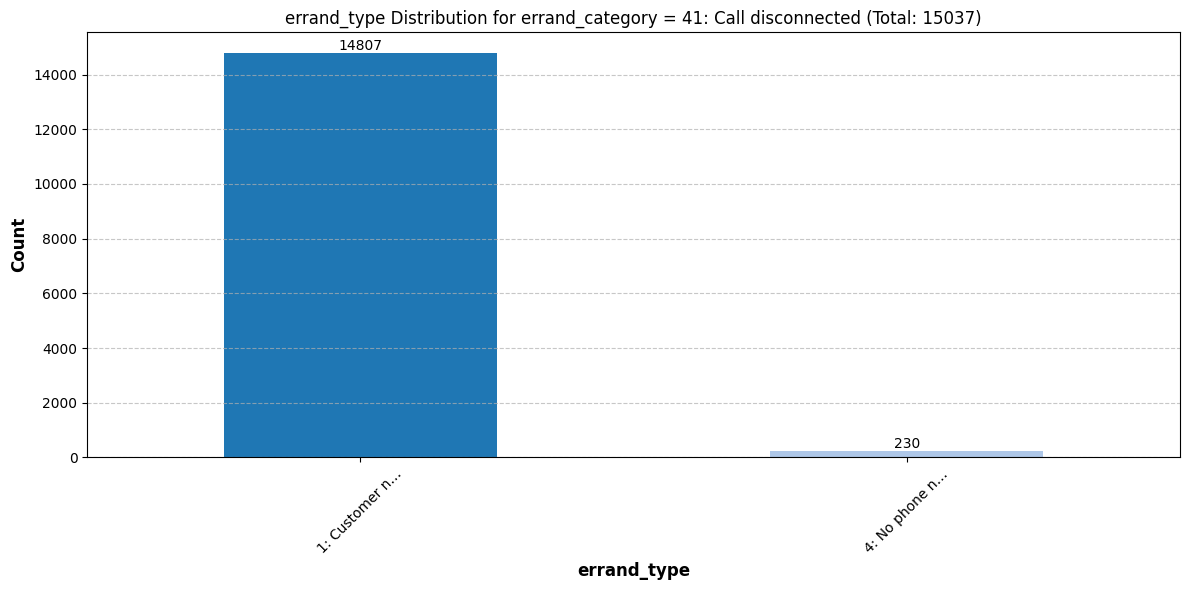

#### errand_category = 3: Claim wrong itinerary/dupe

- **Unique Categories:** 6

- **Gini Coefficient:** 0.3998

- **Top Categories (abs/rel):** 2 / 0.3333



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 2: Dupe                                    |    6667 |  0.7464 |
| 1: Itinerary                               |    1837 |  0.2057 |
| 5: Already handled                         |     206 |  0.0231 |
| 4: Incorrect department-SC                 |     130 |  0.0146 |
| 6: Incorrect department                    |      49 |  0.0055 |
| 3 .Call transfer/Callback (SOD/TL/Manager) |      43 |  0.0048 |



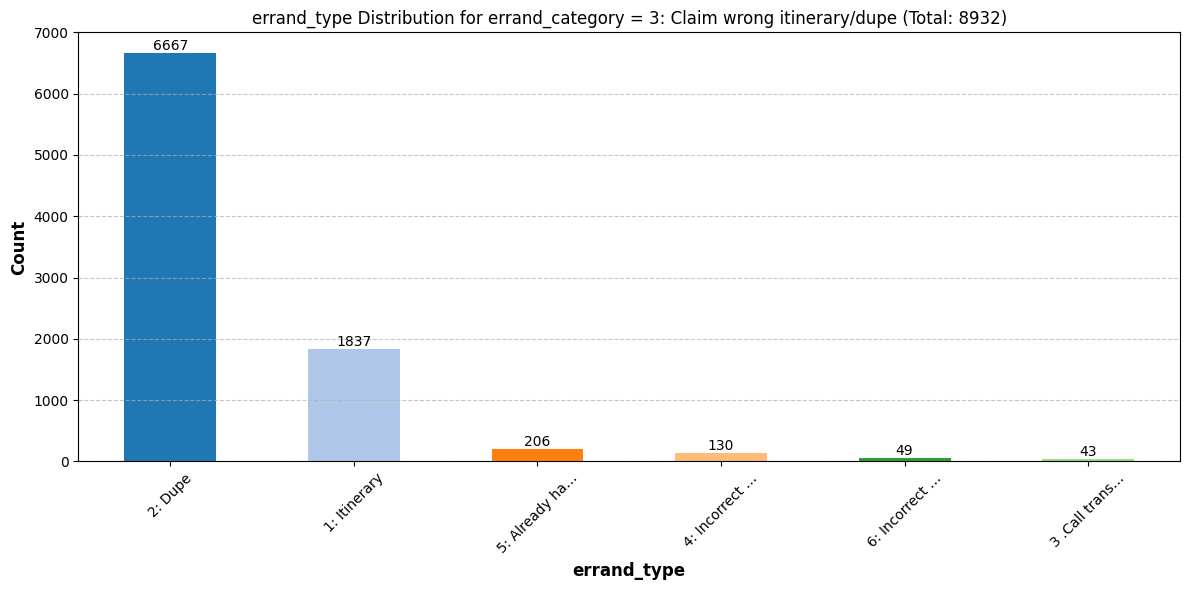

#### errand_category = 13: Language problem

- **Unique Categories:** 2

- **Gini Coefficient:** 0.1078

- **Top Categories (abs/rel):** 1 / 0.5



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 1: Language problem                        |    8047 |  0.9428 |
| 2: Call transfer/Callback (SOD/TL/Manager) |     488 |  0.0572 |



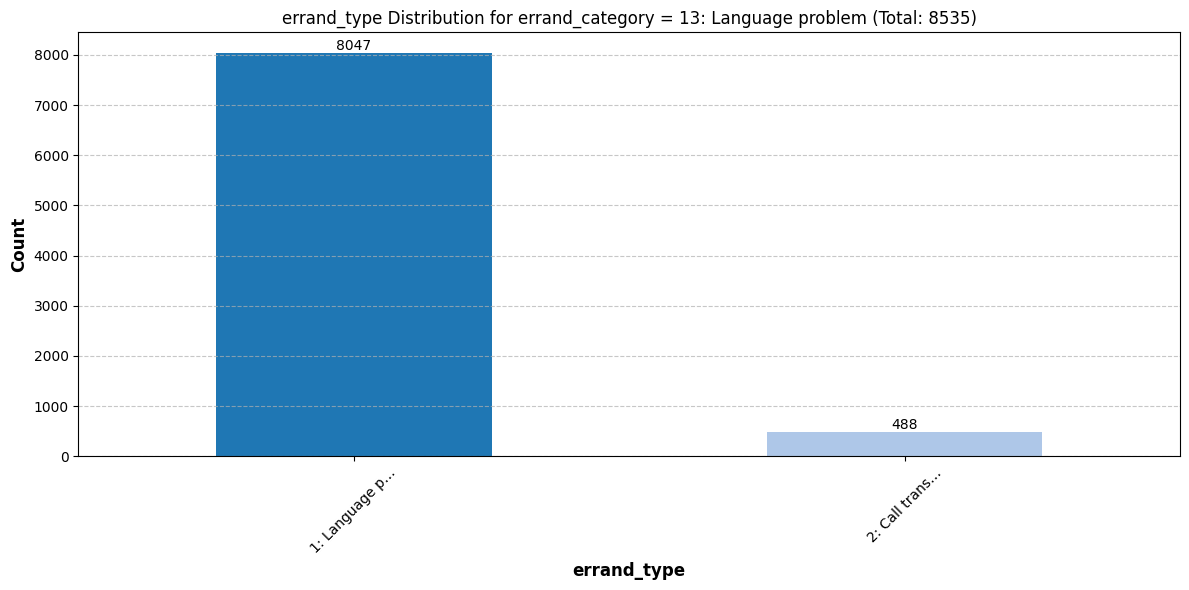

#### errand_category = 11: Site support

- **Unique Categories:** 4

- **Gini Coefficient:** 0.4669

- **Top Categories (abs/rel):** 2 / 0.5



| Category                                          |   Count |   Ratio |
|:--------------------------------------------------|--------:|--------:|
| 1. No booking - general ETG site support          |    1644 |  0.7098 |
| 4. Confirmed booking - general B.com site support |     265 |  0.1144 |
| 2. No booking - general B.com site support        |     246 |  0.1062 |
| 3. Confirmed booking - general ETG site support   |     161 |  0.0695 |



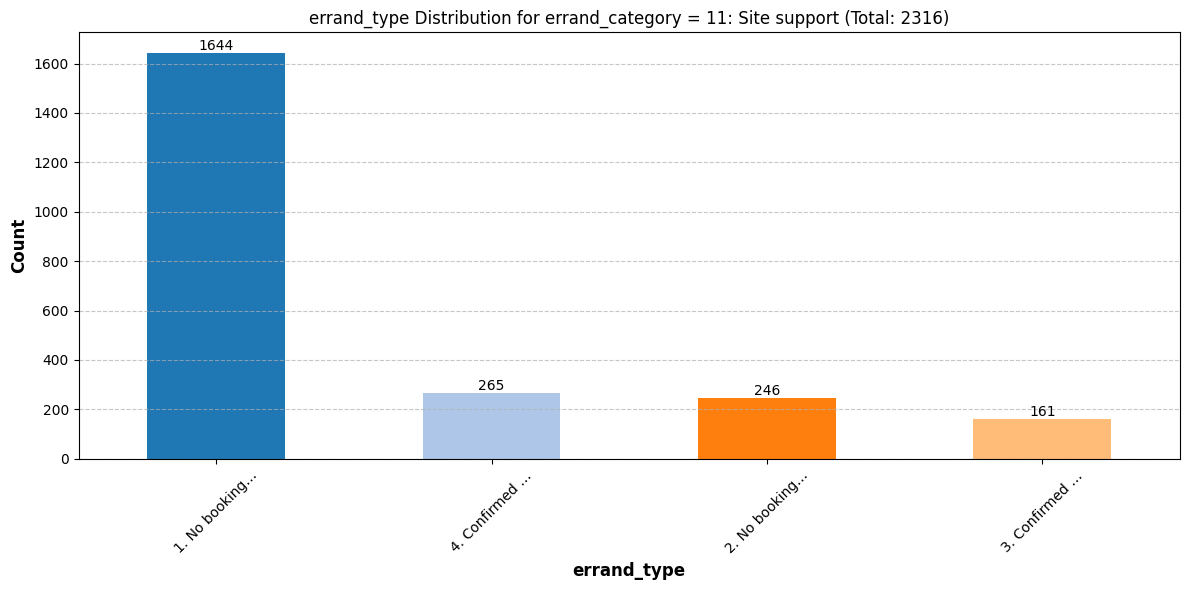

#### errand_category = 14: FL Fraud errands process

- **Unique Categories:** 4

- **Gini Coefficient:** 0.6588

- **Top Categories (abs/rel):** 3 / 0.75



| Category                                                         |   Count |   Ratio |
|:-----------------------------------------------------------------|--------:|--------:|
| 1: Booking confirmation                                          |     511 |  0.4068 |
| 2: Report fraudulent activity/order active or other canx reasons |     414 |  0.3296 |
| 3: Canceled as Fraud/Refund to us note                           |     325 |  0.2588 |
| 4: Canceled as Fraud/Refund to customer note                     |       6 |  0.0048 |



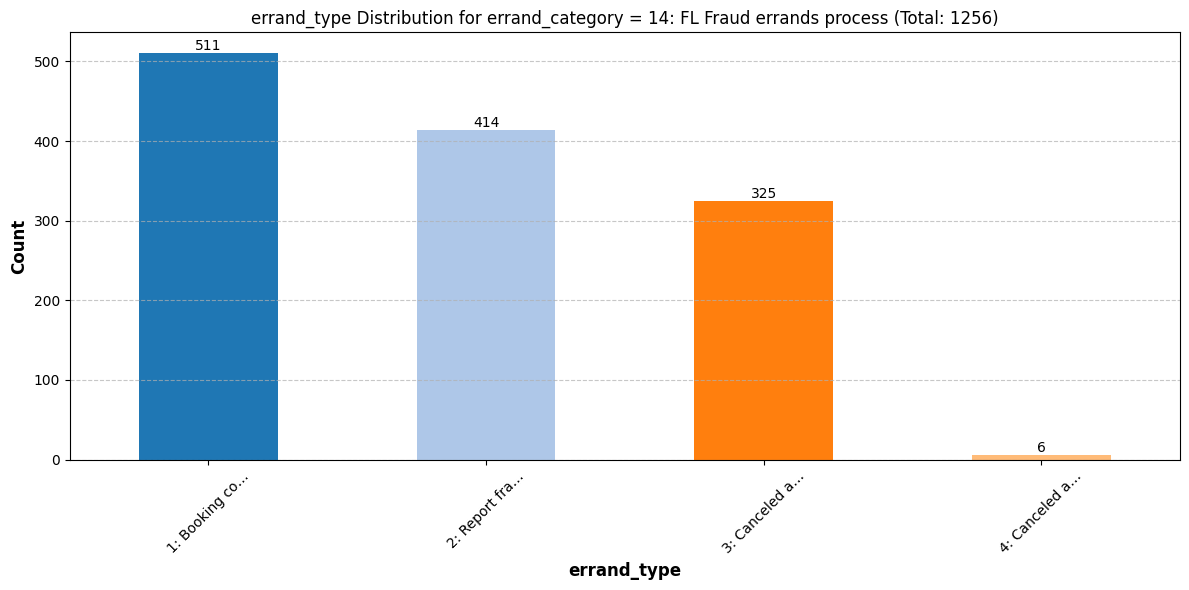

#### errand_category = 25: Other Booking.com products

- **Unique Categories:** 8

- **Gini Coefficient:** 0.4069

- **Top Categories (abs/rel):** 2 / 0.25



| Category                                             |   Count |   Ratio |
|:-----------------------------------------------------|--------:|--------:|
| 2:  Customer will contact Booking.com by him/herself |    3117 |  0.7495 |
| 1:  Cold transfer call To Booking.com                |     717 |  0.1724 |
| 8; Incorrect department                              |     140 |  0.0337 |
| 7; Already handled                                   |      80 |  0.0192 |
| 6. Incorrect department-SC                           |      50 |  0.012  |
| 4, FL voice/email agent                              |      27 |  0.0065 |
| 5, FL support agent                                  |      17 |  0.0041 |
| 3 :Call transfer/Callback (SOD/TL/Manager)           |      11 |  0.0026 |



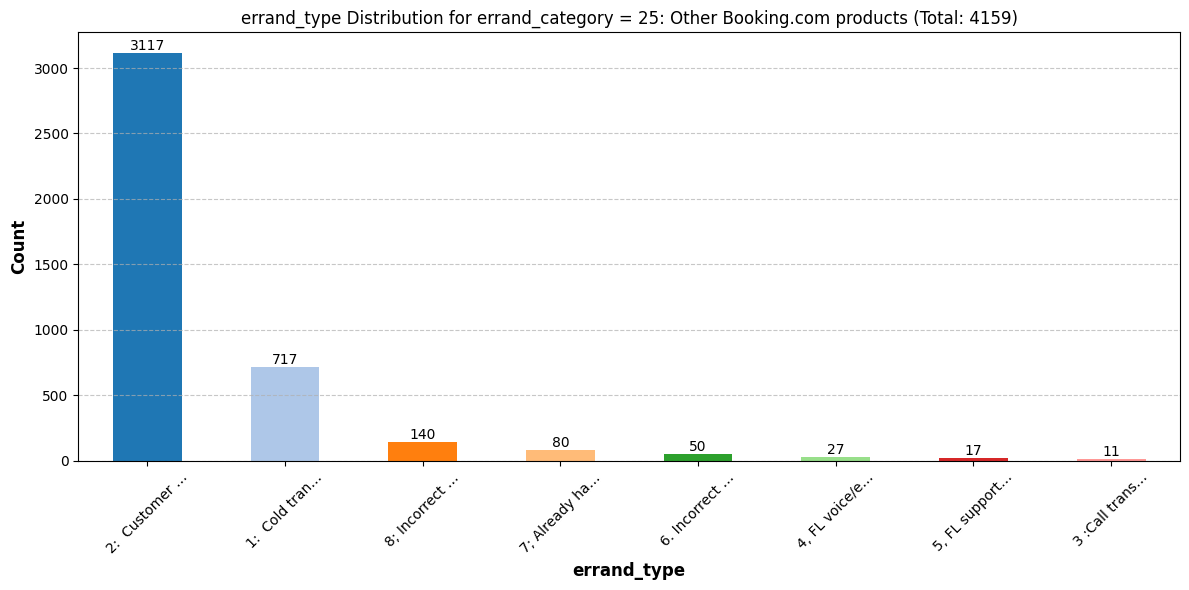

#### errand_category = 20: Ancillary team

- **Unique Categories:** 7

- **Gini Coefficient:** 0.2634

- **Top Categories (abs/rel):** 1 / 0.1429



| Category               |   Count |   Ratio |
|:-----------------------|--------:|--------:|
| 6: Ancillary add on    |     902 |  0.8534 |
| 1:  Baggage            |      86 |  0.0814 |
| 2: Seating             |      40 |  0.0378 |
| 7: Meal                |      15 |  0.0142 |
| 12: US-Ancillary       |      11 |  0.0104 |
| 3: Visa                |       2 |  0.0019 |
| 9: Post Booking Bagage |       1 |  0.0009 |



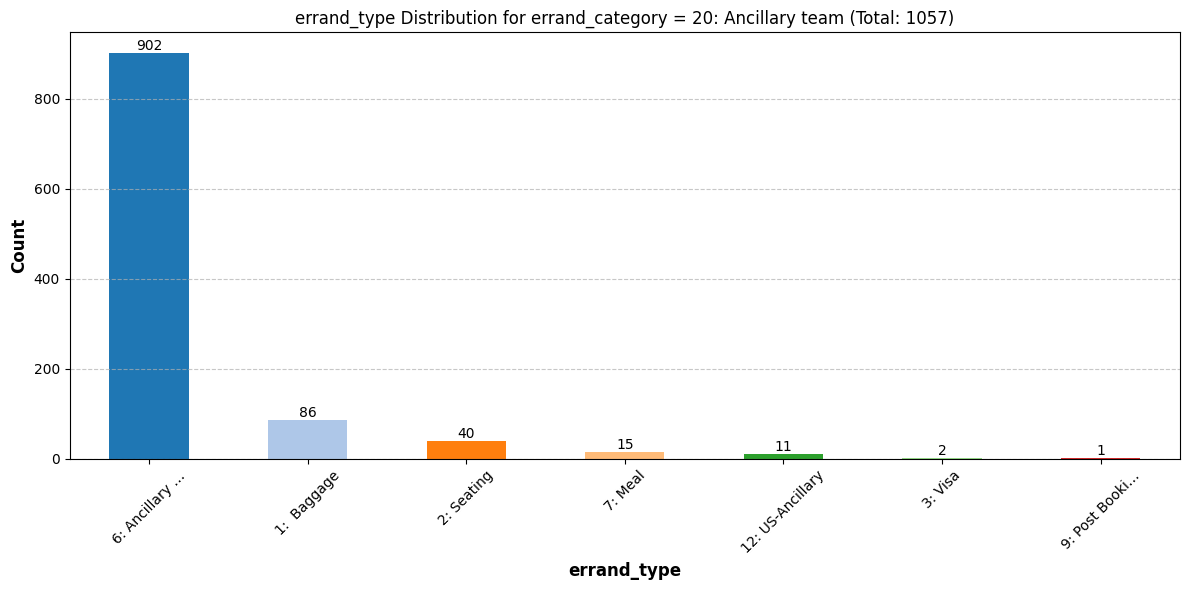

#### errand_category = 46: No information provided

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category                         |   Count |   Ratio |
|:---------------------------------|--------:|--------:|
| 1: Customer not reached on phone |    1850 |       1 |



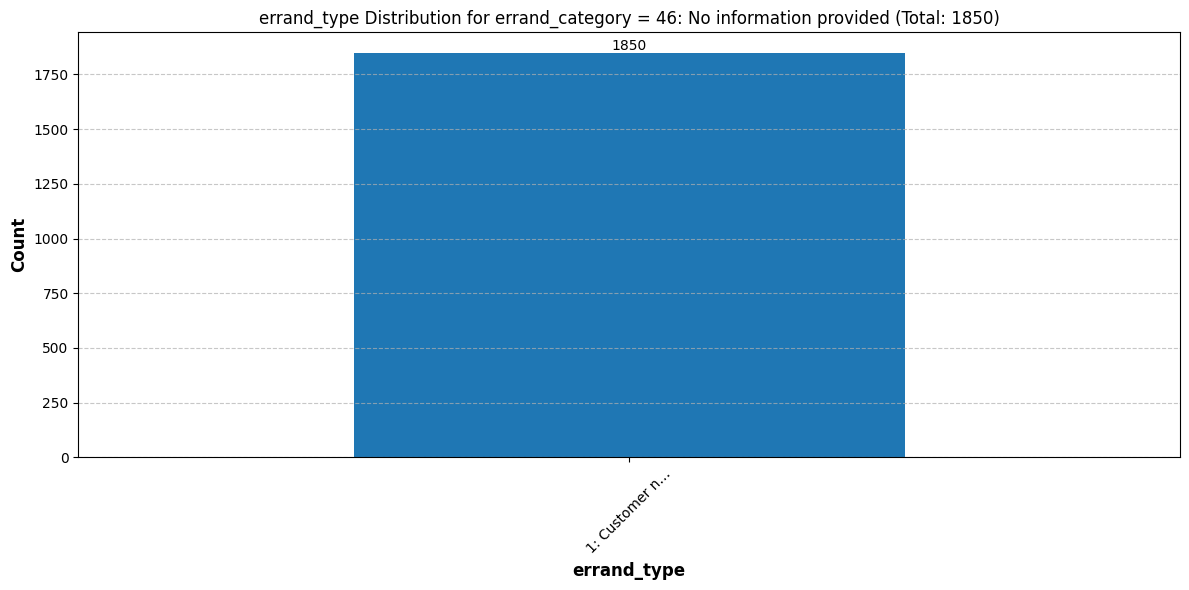

#### errand_category = 10: Force Majeure

- **Unique Categories:** 11

- **Gini Coefficient:** 0.6461

- **Top Categories (abs/rel):** 3 / 0.2727



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 2: Cancel                                  |    3503 |  0.5211 |
| 1: Rebook                                  |    1693 |  0.2519 |
| 3: General questions                       |     863 |  0.1284 |
| 11. Incorrect department                   |     233 |  0.0347 |
| 4: Open ticket                             |     178 |  0.0265 |
| 5: Voucher                                 |     138 |  0.0205 |
| 9. Incorrect department-SC                 |      35 |  0.0052 |
| 10. Already handled                        |      34 |  0.0051 |
| 8: Already handled SC                      |      30 |  0.0045 |
| 7. Call transfer/Callback (SOD/TL/Manager) |      14 |  0.0021 |
| 6: Self Service Rebooking                  |       1 |  0.0001 |



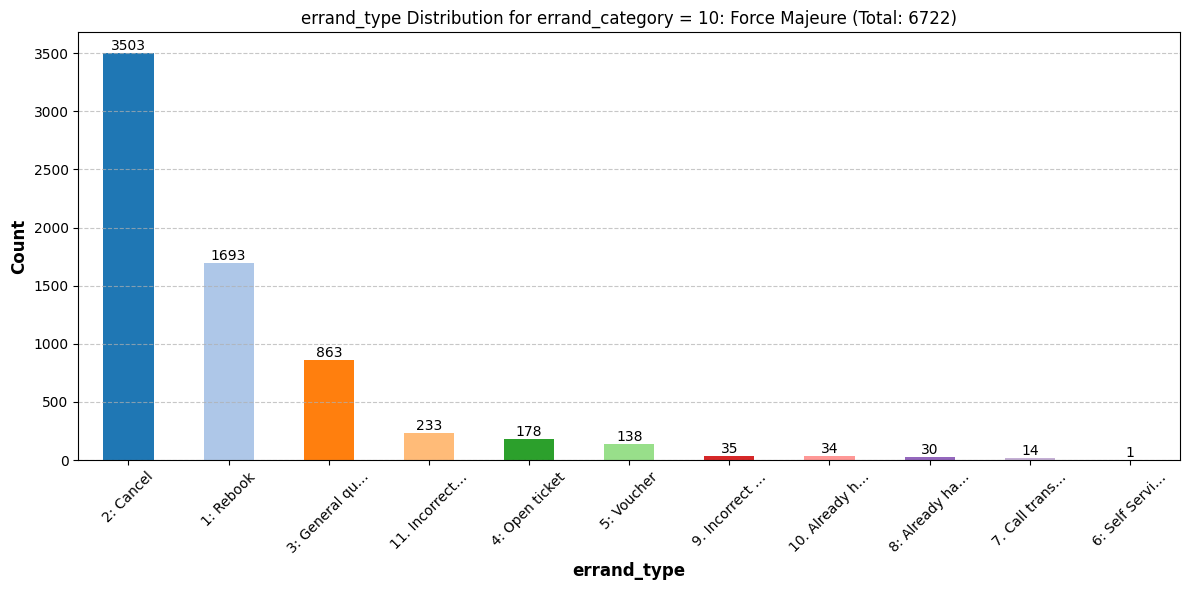

#### errand_category = 24: Accommodation 

- **Unique Categories:** 4

- **Gini Coefficient:** 0.4909

- **Top Categories (abs/rel):** 2 / 0.5



| Category                                            |   Count |   Ratio |
|:----------------------------------------------------|--------:|--------:|
| 2: Customer will contact Booking.com by him/herself |     212 |  0.6181 |
| 1: Cold transfer call To Booking.com                |     122 |  0.3557 |
| 4 : FL voice/email agent                            |       8 |  0.0233 |
| 5 : FL support agent                                |       1 |  0.0029 |



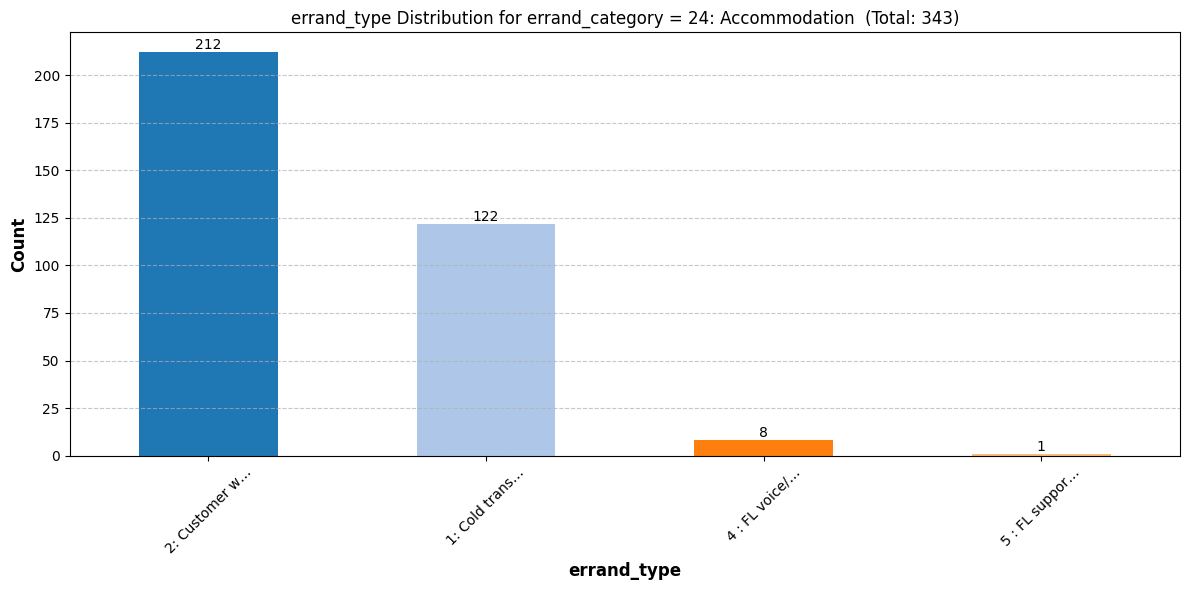

#### errand_category = 26: Booking.com phase 1 - No order in Edvin

- **Unique Categories:** 10

- **Gini Coefficient:** 0.8088

- **Top Categories (abs/rel):** 4 / 0.4



| Category                                                     |   Count |   Ratio |
|:-------------------------------------------------------------|--------:|--------:|
| 12: Incorrect department                                     |      86 |  0.2774 |
| 5: Non - Edvin order                                         |      66 |  0.2129 |
| 3: Order number not provided                                 |      65 |  0.2097 |
| 4: Customer disconnected during call                         |      41 |  0.1323 |
| 1: Booking.com agent transferred the customer to ETG support |      20 |  0.0645 |
| 6: Pre-booking questions                                     |      13 |  0.0419 |
| 2: Failed order                                              |      11 |  0.0355 |
| 7 : Call transfer/Callback (SOD/TL/Manager)                  |       4 |  0.0129 |
| 8 : FL voice/email agent                                     |       3 |  0.0097 |
| 11: Already handled                                          |       1 |  0.0032 |



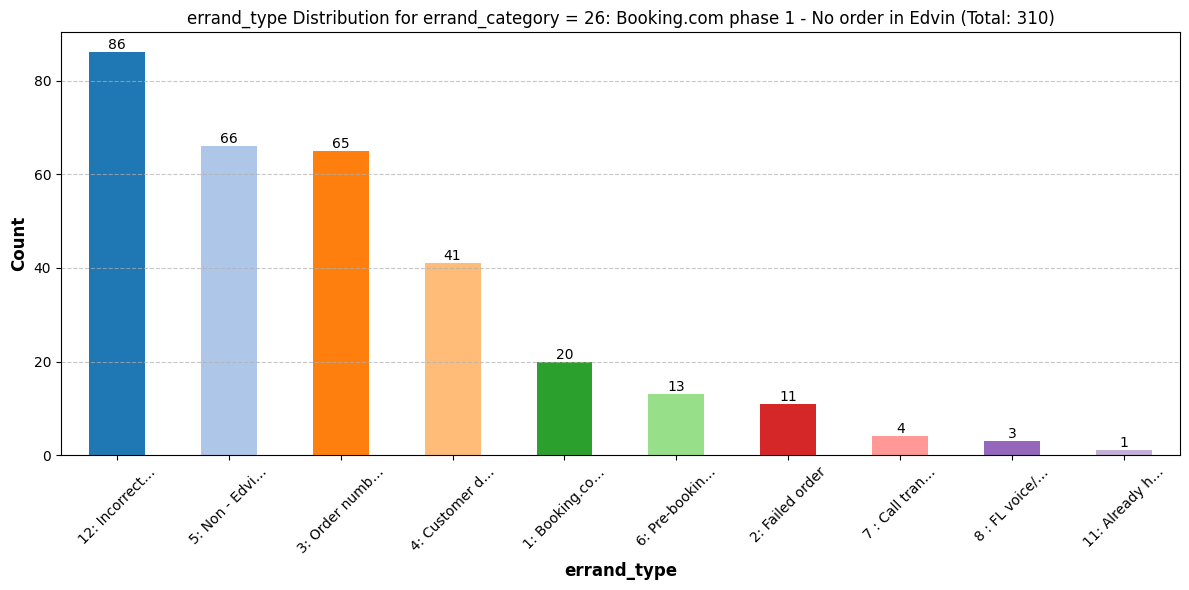

#### errand_category = 27: Trustpilot

- **Unique Categories:** 2

- **Gini Coefficient:** 0.4898

- **Top Categories (abs/rel):** 2 / 1.0



| Category           |   Count |   Ratio |
|:-------------------|--------:|--------:|
| 1: Customer Claim  |       4 |  0.5714 |
| 2: Positive Review |       3 |  0.4286 |



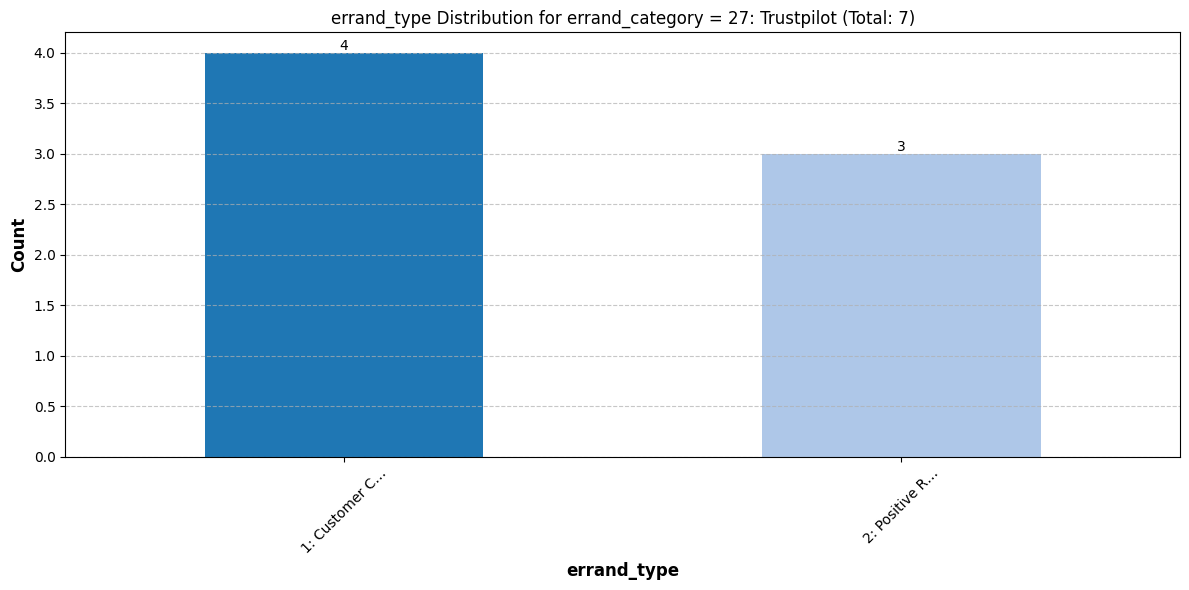

#### errand_category = 31: P&F Fraud

- **Unique Categories:** 4

- **Gini Coefficient:** 0.6818

- **Top Categories (abs/rel):** 3 / 0.75



| Category                             |   Count |   Ratio |
|:-------------------------------------|--------:|--------:|
| 2:Fraud Detected - Manual Review     |      55 |  0.4044 |
| 4: Fraud Detected - Fraud Alert      |      40 |  0.2941 |
| 1: Canceled Booking - Ask refund     |      35 |  0.2574 |
| 3: Fraud- Detected - Machine Learing |       6 |  0.0441 |



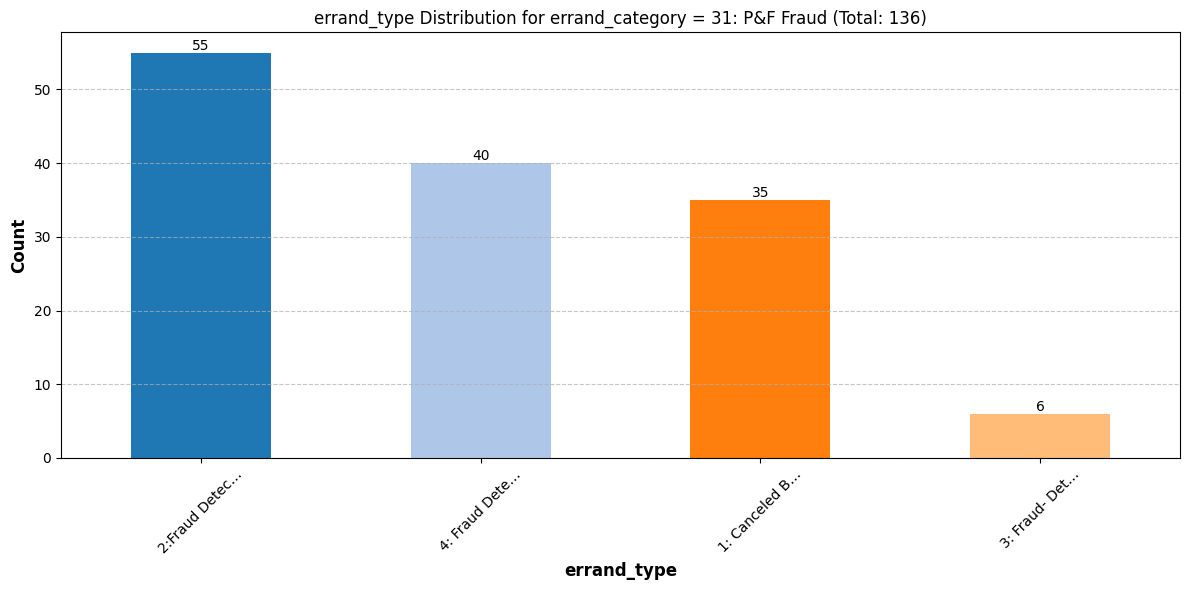

#### errand_category = 54: Claim form sent

- **Unique Categories:** 10

- **Gini Coefficient:** 0.8771

- **Top Categories (abs/rel):** 7 / 0.7



| Category              |   Count |   Ratio |
|:----------------------|--------:|--------:|
| 6; Schedule Change    |      25 |  0.1866 |
| 3; Cancellation       |      18 |  0.1343 |
| 1; Add ons            |      18 |  0.1343 |
| 4; Rebooking          |      17 |  0.1269 |
| 9; Refund             |      17 |  0.1269 |
| 11; Airline / Airport |      12 |  0.0896 |
| 10; Site / Ticket     |      11 |  0.0821 |
| 8; Payment            |       7 |  0.0522 |
| 5; Name               |       5 |  0.0373 |
| 2; Fees               |       4 |  0.0299 |



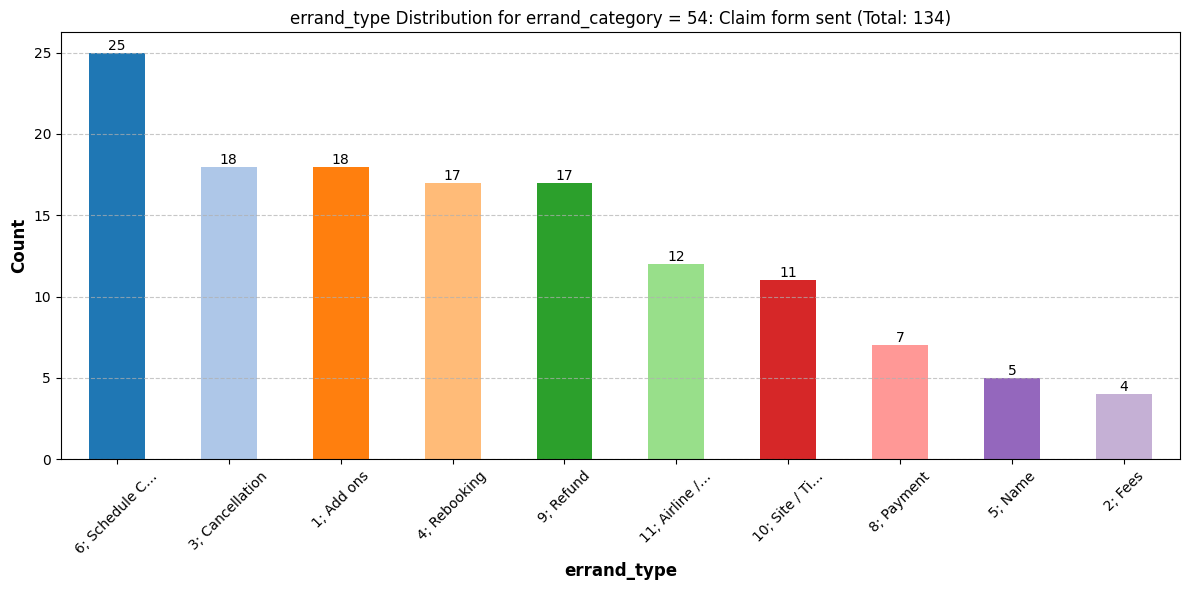

#### errand_category = 34: Backend BOM

- **Unique Categories:** 8

- **Gini Coefficient:** 0.6992

- **Top Categories (abs/rel):** 3 / 0.375



| Category                           |   Count |   Ratio |
|:-----------------------------------|--------:|--------:|
| 8: Vol rfd                         |      53 |  0.4309 |
| 34: APPR/MPPR                      |      35 |  0.2846 |
| 9: SC                              |      21 |  0.1707 |
| 36: E-track                        |       8 |  0.065  |
| 25: Support                        |       3 |  0.0244 |
| 23: Multi Technical error - Ticket |       1 |  0.0081 |
| 33: Cancellation Guarantee         |       1 |  0.0081 |
| 2:  Issue                          |       1 |  0.0081 |



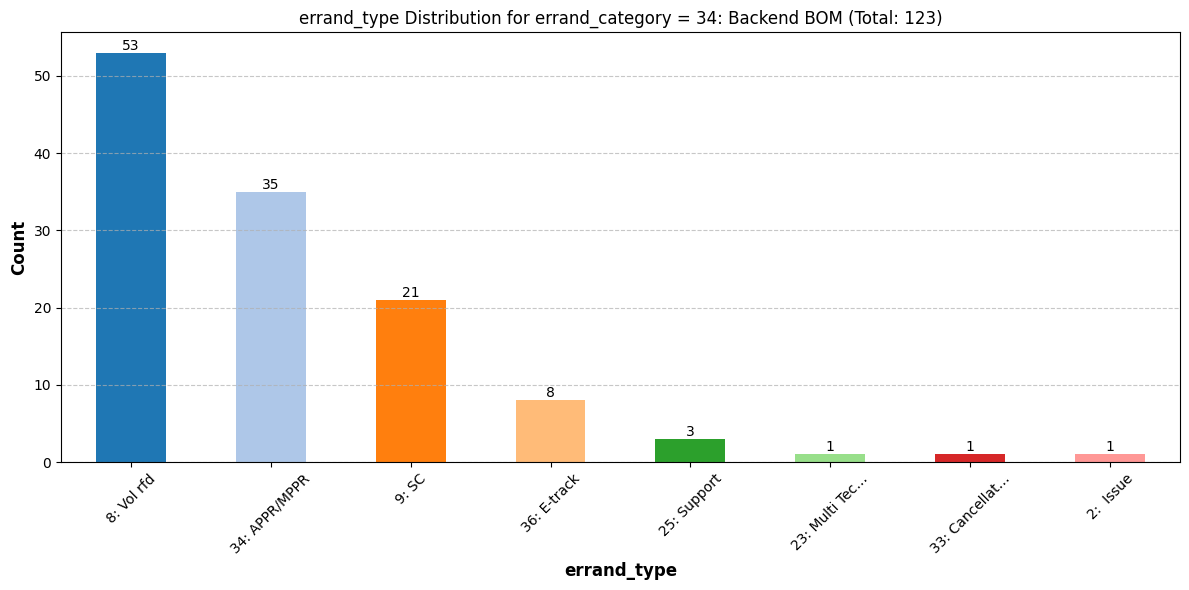

#### errand_category = 32: P&F Chargeback

- **Unique Categories:** 5

- **Gini Coefficient:** 0.5262

- **Top Categories (abs/rel):** 2 / 0.4



| Category                |   Count |   Ratio |
|:------------------------|--------:|--------:|
| 1:Information request   |     539 |  0.5796 |
| 2:  Chargeback Handling |     344 |  0.3699 |
| 4: VC Chargeback        |      26 |  0.028  |
| 3: Refund (pre-CB)      |      11 |  0.0118 |
| 5: ADM Handling         |      10 |  0.0108 |



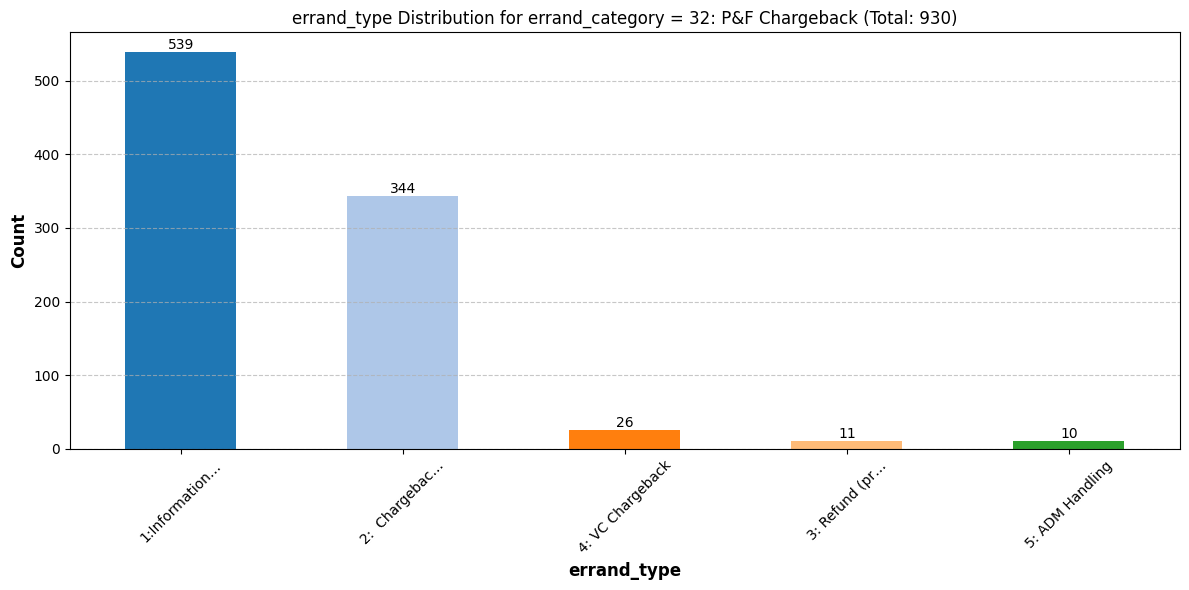

#### errand_category = 30: Supplier Call

- **Unique Categories:** 3

- **Gini Coefficient:** 0.58

- **Top Categories (abs/rel):** 2 / 0.6667



| Category                 |   Count |   Ratio |
|:-------------------------|--------:|--------:|
| 4.. FL voice/email agent |       5 |     0.5 |
| 5.. FL support agent     |       4 |     0.4 |
| 2: Airline               |       1 |     0.1 |



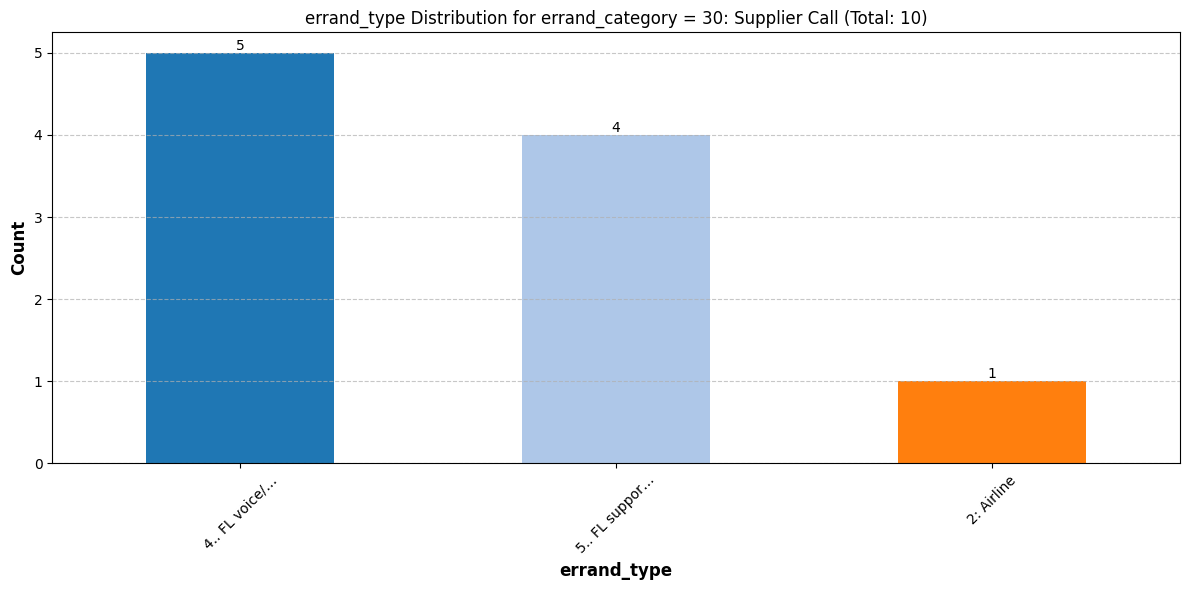

#### errand_category = 23: Legal and Authority Claims Team

- **Unique Categories:** 8

- **Gini Coefficient:** 0.8356

- **Top Categories (abs/rel):** 6 / 0.75



| Category                            |   Count |   Ratio |
|:------------------------------------|--------:|--------:|
| 1: First Line - Cancellation        |       4 |  0.2667 |
| None                                |       3 |  0.2    |
| 6: First Line - Virtual Interlining |       2 |  0.1333 |
| 11: Customer Experience             |       2 |  0.1333 |
| 12: Airlines                        |       1 |  0.0667 |
| 2: First Line - Rebooking           |       1 |  0.0667 |
| 9: Payments                         |       1 |  0.0667 |
| 4: First Line - Name Correction     |       1 |  0.0667 |



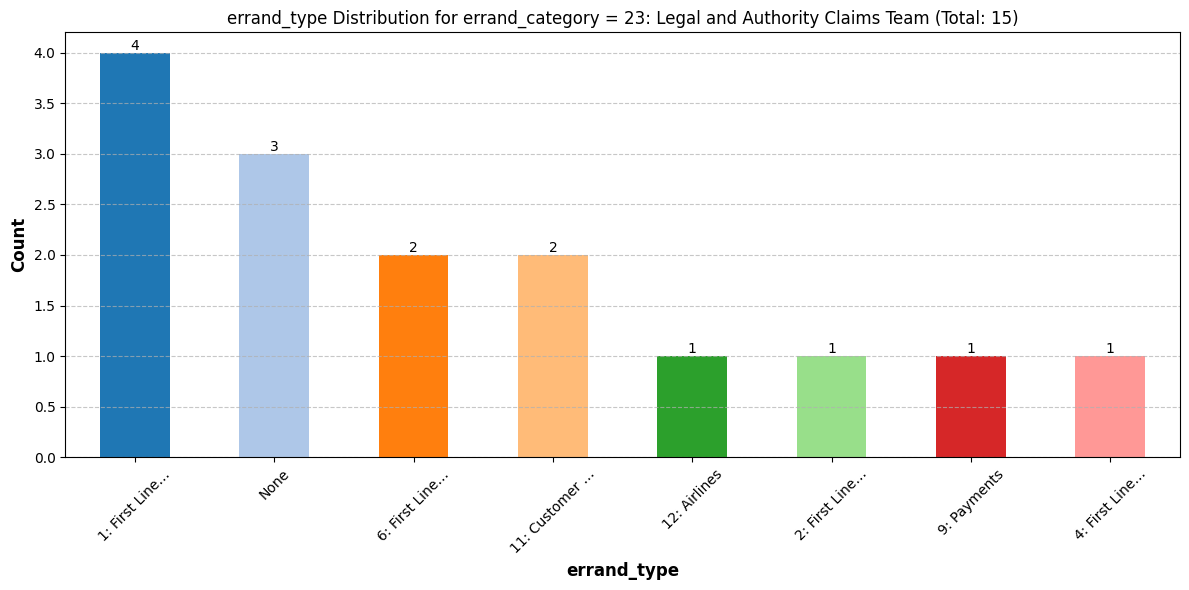

#### errand_category = 42: Customer feedback

- **Unique Categories:** 2

- **Gini Coefficient:** 0.3649

- **Top Categories (abs/rel):** 2 / 1.0



| Category                  |   Count |   Ratio |
|:--------------------------|--------:|--------:|
| 1: Ryanair feedback       |     231 |  0.7599 |
| 2: Call recording request |      73 |  0.2401 |



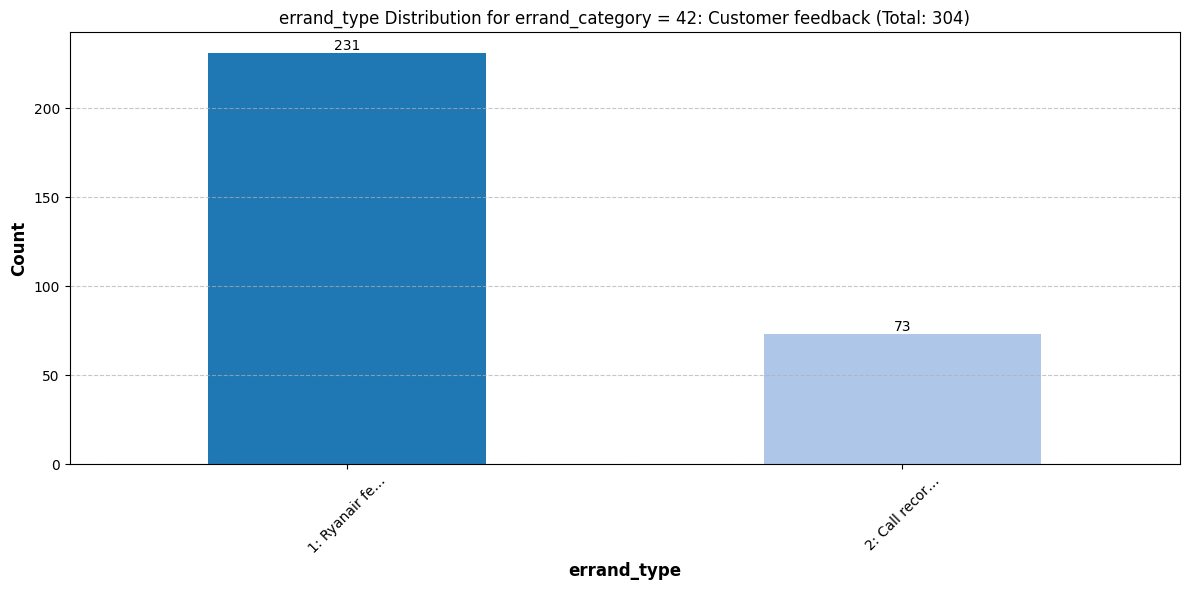

#### errand_category = 16: Backend UPA

- **Unique Categories:** 2

- **Gini Coefficient:** 0.4444

- **Top Categories (abs/rel):** 2 / 1.0



| Category      |   Count |   Ratio |
|:--------------|--------:|--------:|
| 13:Tech error |       2 |  0.6667 |
| 6:Etrack      |       1 |  0.3333 |



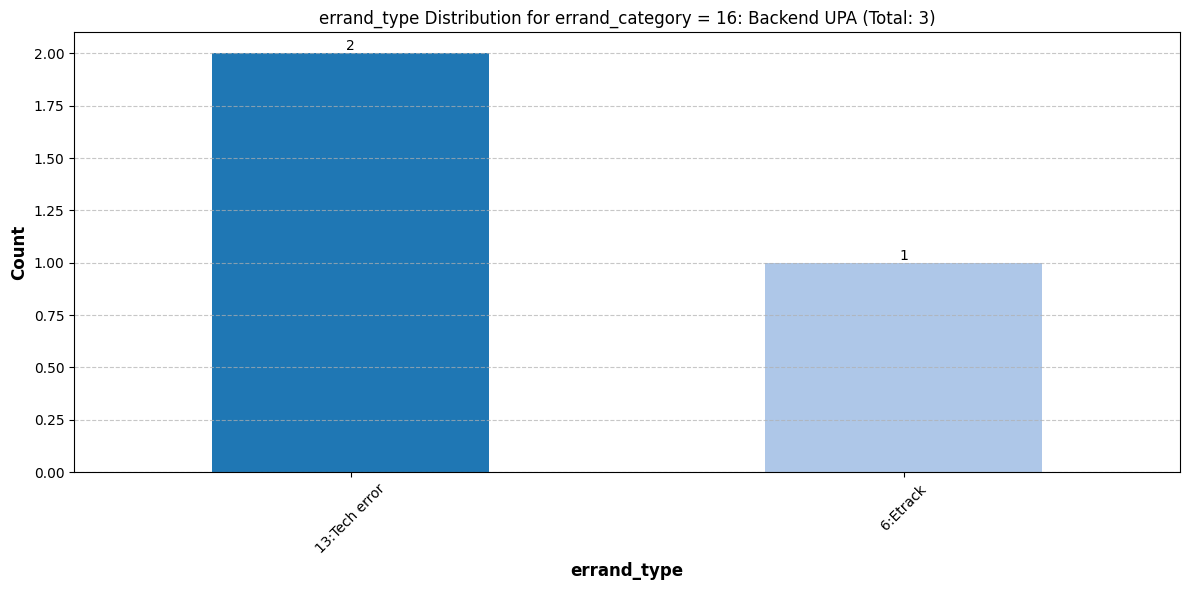

#### errand_category = 44: Payouts & Accounting

- **Unique Categories:** 9

- **Gini Coefficient:** 0.7554

- **Top Categories (abs/rel):** 4 / 0.4444



| Category           |   Count |   Ratio |
|:-------------------|--------:|--------:|
| 7. Tech Error      |      26 |  0.321  |
| 1. Vol. refund     |      26 |  0.321  |
| 6. Ancillaries     |      11 |  0.1358 |
| 2. SC              |      11 |  0.1358 |
| 5. Etrack          |       2 |  0.0247 |
| 19: Orphan Funds   |       2 |  0.0247 |
| 3. FM              |       1 |  0.0123 |
| 9. Canx. Guarantee |       1 |  0.0123 |
| 14. VC Dispute     |       1 |  0.0123 |



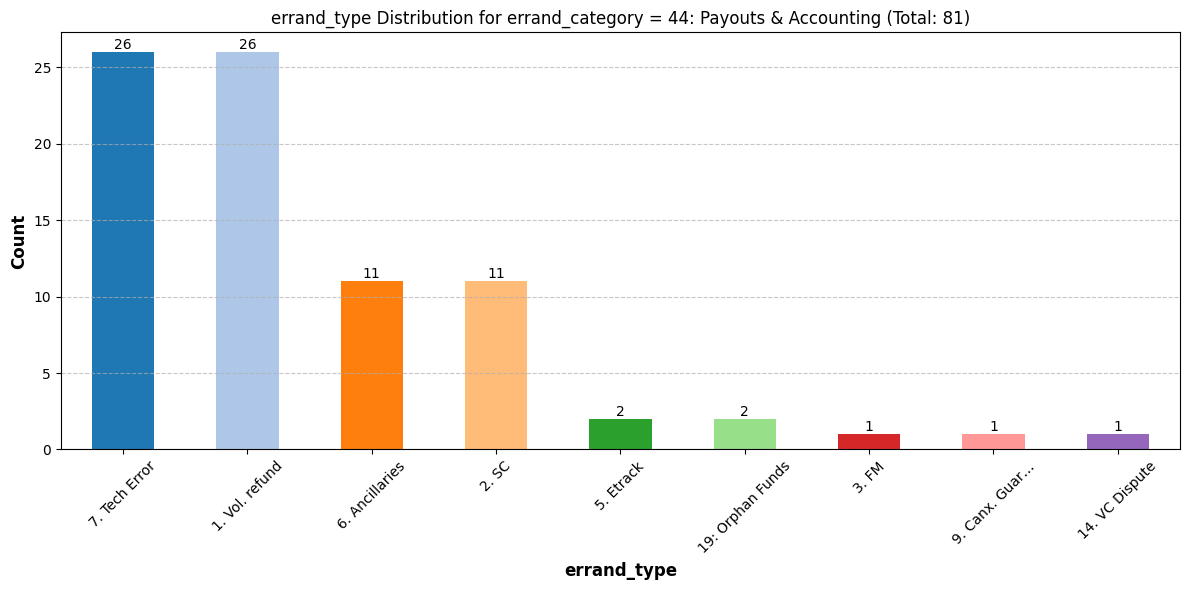

#### errand_category = 22: Backend ATH

- **Unique Categories:** 4

- **Gini Coefficient:** 0.5422

- **Top Categories (abs/rel):** 2 / 0.5



| Category        |   Count |   Ratio |
|:----------------|--------:|--------:|
| 6: Etrack       |      40 |  0.6349 |
| 1: Vol rfd (GR) |      12 |  0.1905 |
| 3:  SC (GR)     |       8 |  0.127  |
| 2: FM (GR)      |       3 |  0.0476 |



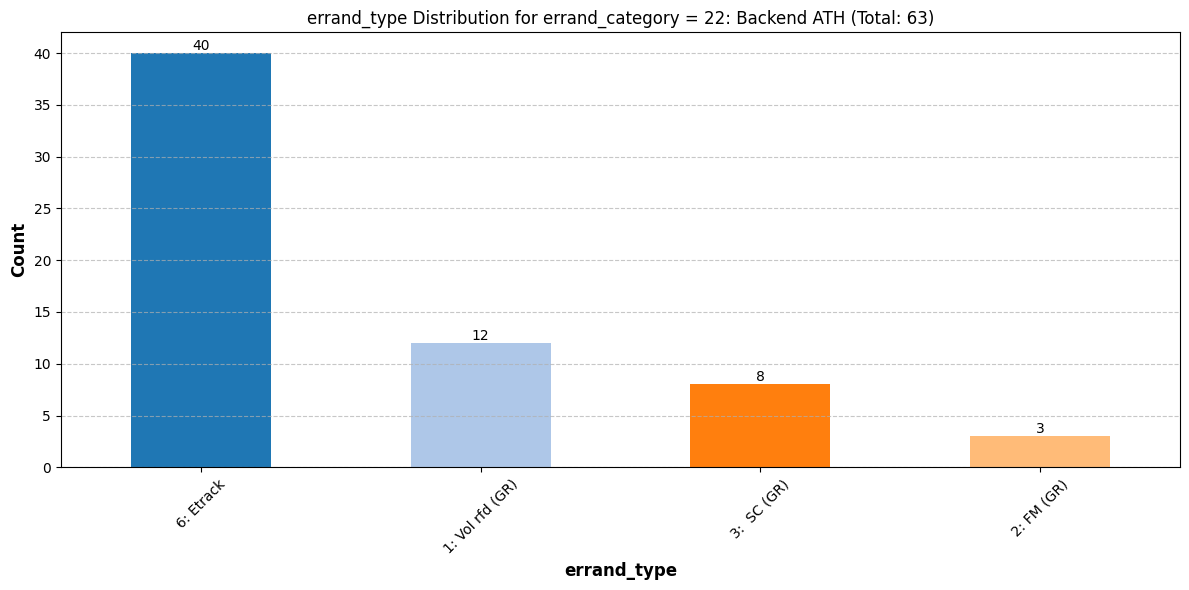

#### errand_category = 29: Leaders

- **Unique Categories:** 3

- **Gini Coefficient:** 0.3264

- **Top Categories (abs/rel):** 1 / 0.3333



| Category             |   Count |   Ratio |
|:---------------------|--------:|--------:|
| 2: Supervisor call   |     101 |  0.8016 |
| 3: Escalation        |      22 |  0.1746 |
| 5 ; FL support agent |       3 |  0.0238 |



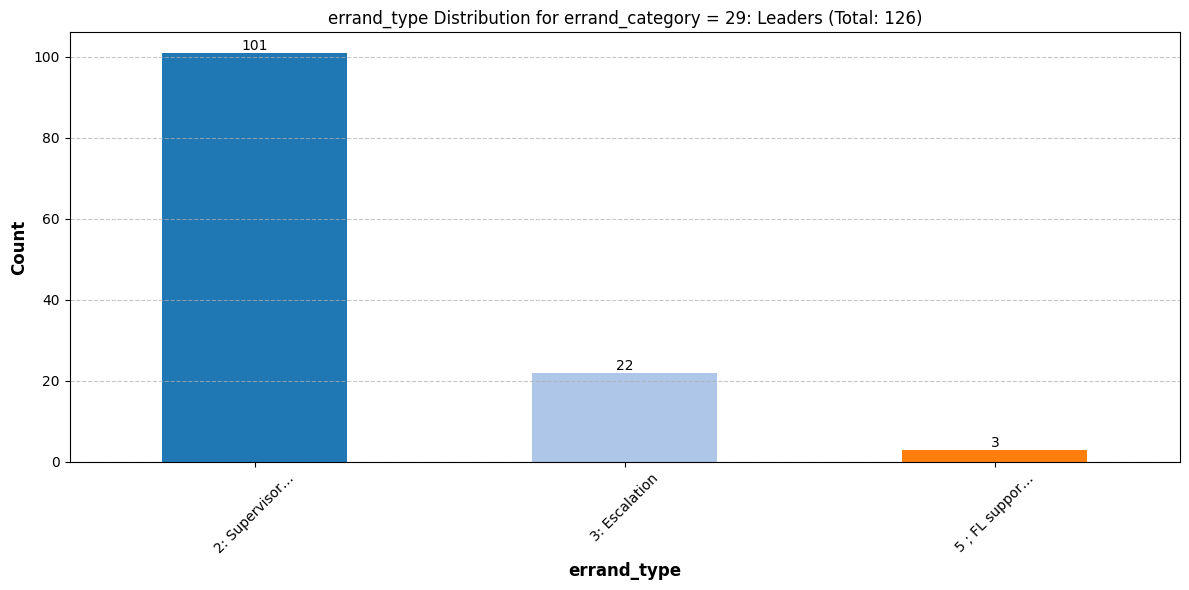

#### errand_category = 36: ETG Escalation

- **Unique Categories:** 7

- **Gini Coefficient:** 0.3469

- **Top Categories (abs/rel):** 1 / 0.1429



| Category                                   |   Count |   Ratio |
|:-------------------------------------------|--------:|--------:|
| 5. Call transfer/Callback (SOD/TL/Manager) |      45 |  0.8036 |
| 1: Airline                                 |       3 |  0.0536 |
| 8. Other Partners                          |       2 |  0.0357 |
| 4: Management                              |       2 |  0.0357 |
| 12: Already handled                        |       2 |  0.0357 |
| 9. Booking.com                             |       1 |  0.0179 |
| 13: Incorrect department                   |       1 |  0.0179 |



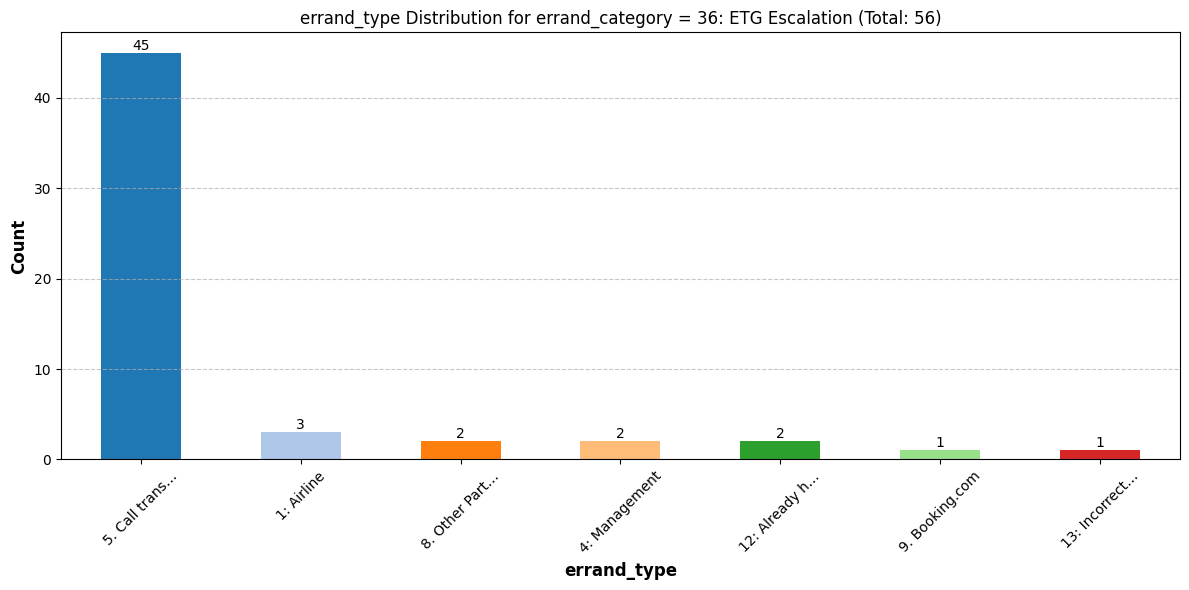

#### errand_category = 50: Consumer Claims Team

- **Unique Categories:** 9

- **Gini Coefficient:** 0.852

- **Top Categories (abs/rel):** 6 / 0.6667



| Category                                       |   Count |   Ratio |
|:-----------------------------------------------|--------:|--------:|
| 5:. First Line - Add-ons                       |      11 |    0.22 |
| 12:. Airlines                                  |      10 |    0.2  |
| 3:. First Line - Schedule Change               |       8 |    0.16 |
| 13:. Other Issues                              |       6 |    0.12 |
| 2:. First Line - Rebooking                     |       4 |    0.08 |
| 1:. First Line - Cancellation                  |       4 |    0.08 |
| 4:. First Line - Name Correction               |       3 |    0.06 |
| 7:. First Line - Personal Details Modification |       2 |    0.04 |
| 9:. Payments                                   |       2 |    0.04 |



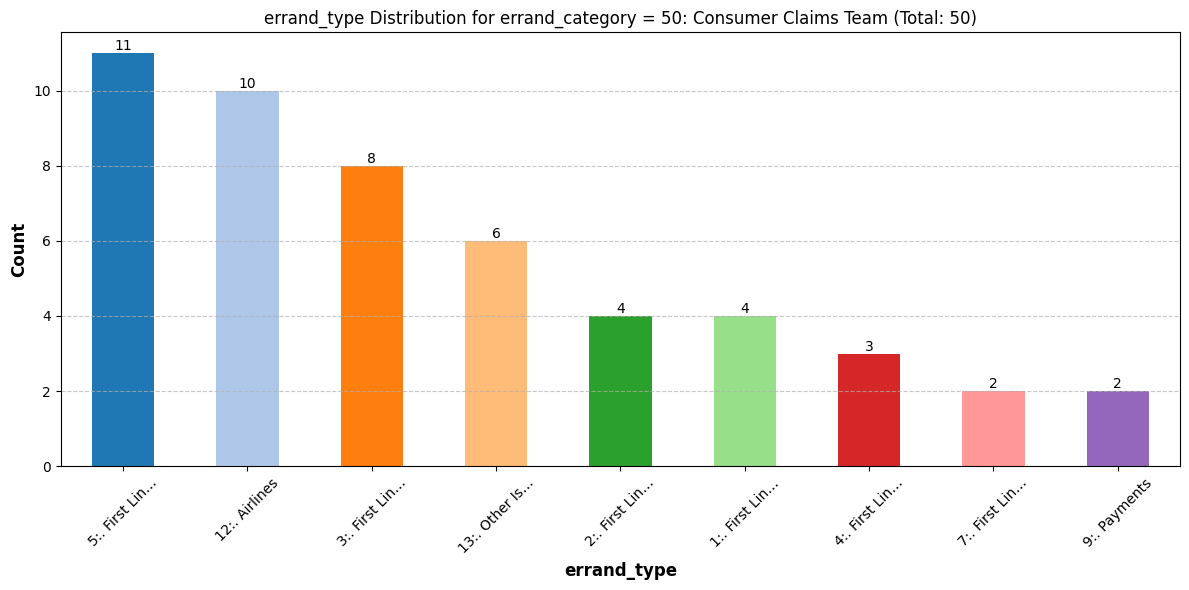

#### errand_category = 40: Backend BOM TKT

- **Unique Categories:** 12

- **Gini Coefficient:** 0.7919

- **Top Categories (abs/rel):** 4 / 0.3333



| Category                           | Count   | Ratio   |
|:-----------------------------------|:--------|:--------|
| 7: Confirmation                    | 104     | 0.324   |
| 1. Reissue                         | 77      | 0.2399  |
| 2; Issue                           | 59      | 0.1838  |
| 4; Technical Error - Ticket        | 21      | 0.0654  |
| 22: Seat Map                       | 17      | 0.053   |
| ...                                | ...     | ...     |
| 3: Queue Back                      | 8       | 0.0249  |
| 12: Multi Technical error - ticket | 4       | 0.0125  |
| 23: Cabin Baggage                  | 1       | 0.0031  |
| 21: Seating                        | 1       | 0.0031  |
| 27: OTRS                           | 1       | 0.0031  |



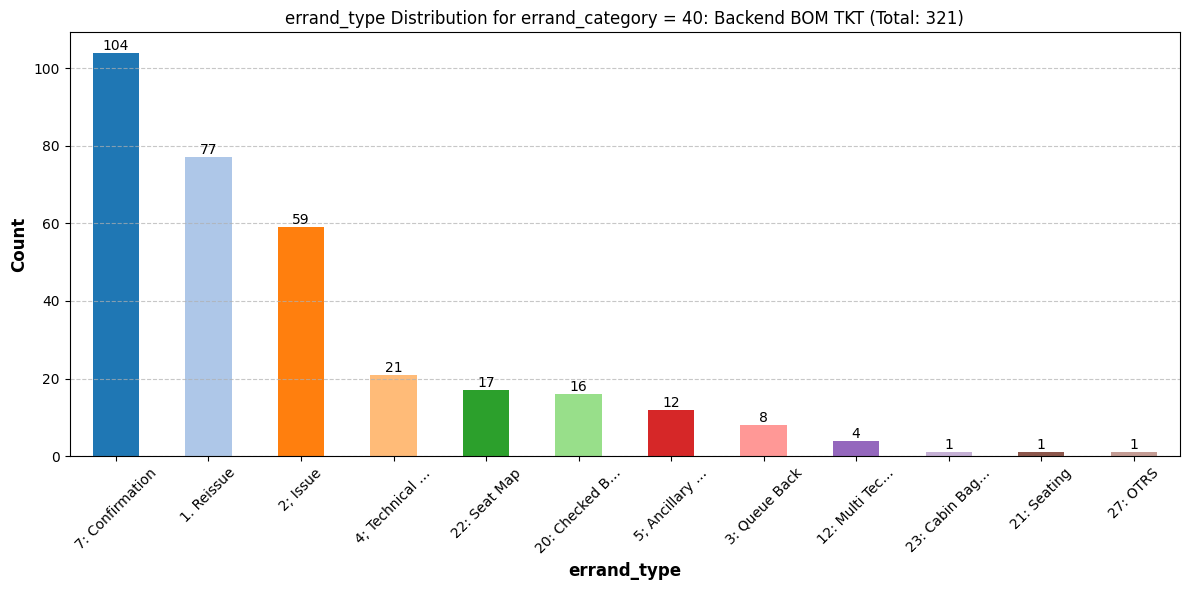

#### errand_category = 53: Retail Loss

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category                |   Count |   Ratio |
|:------------------------|--------:|--------:|
| 1: Retail loss recovery |      25 |       1 |



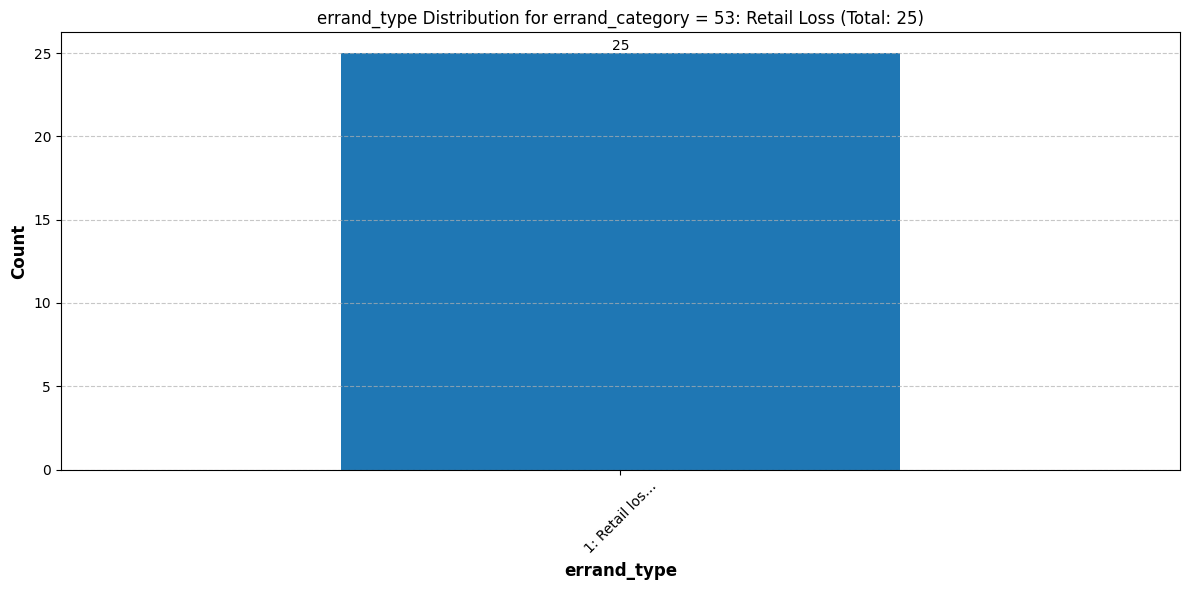

#### errand_category = 55: Manual Booking

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category     |   Count |   Ratio |
|:-------------|--------:|--------:|
| 2. Cancelled |       1 |       1 |



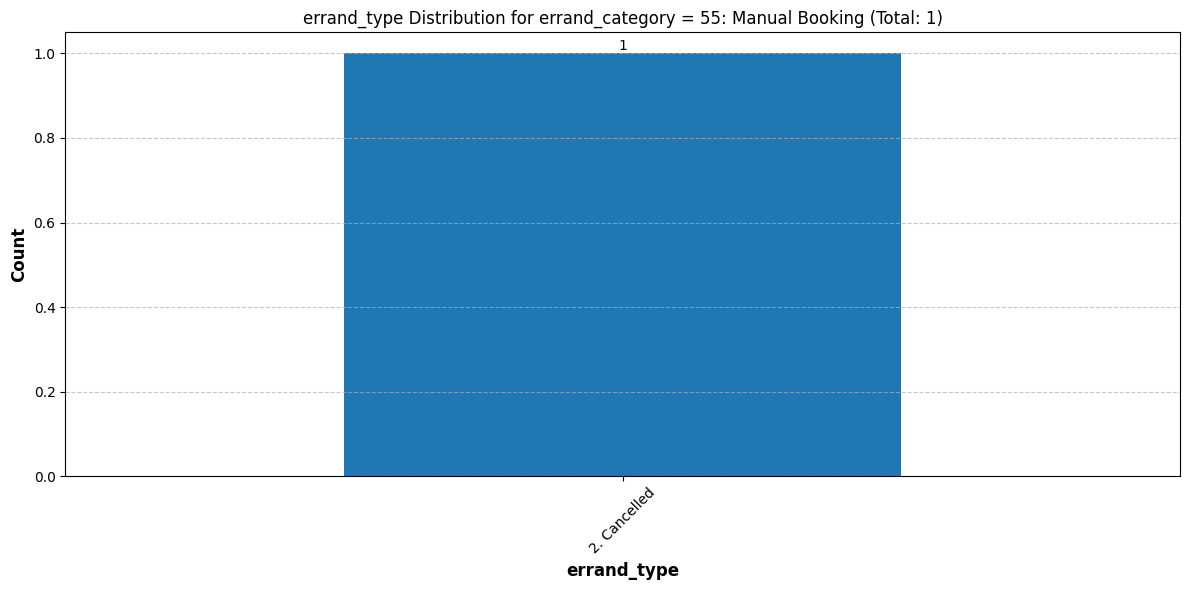

#### errand_category = 49: FL/SC OUT Support

- **Unique Categories:** 2

- **Gini Coefficient:** 0.4444

- **Top Categories (abs/rel):** 2 / 1.0



| Category              |   Count |   Ratio |
|:----------------------|--------:|--------:|
| 6. SC Urgent Handling |       2 |  0.6667 |
| 2. Tech Support       |       1 |  0.3333 |



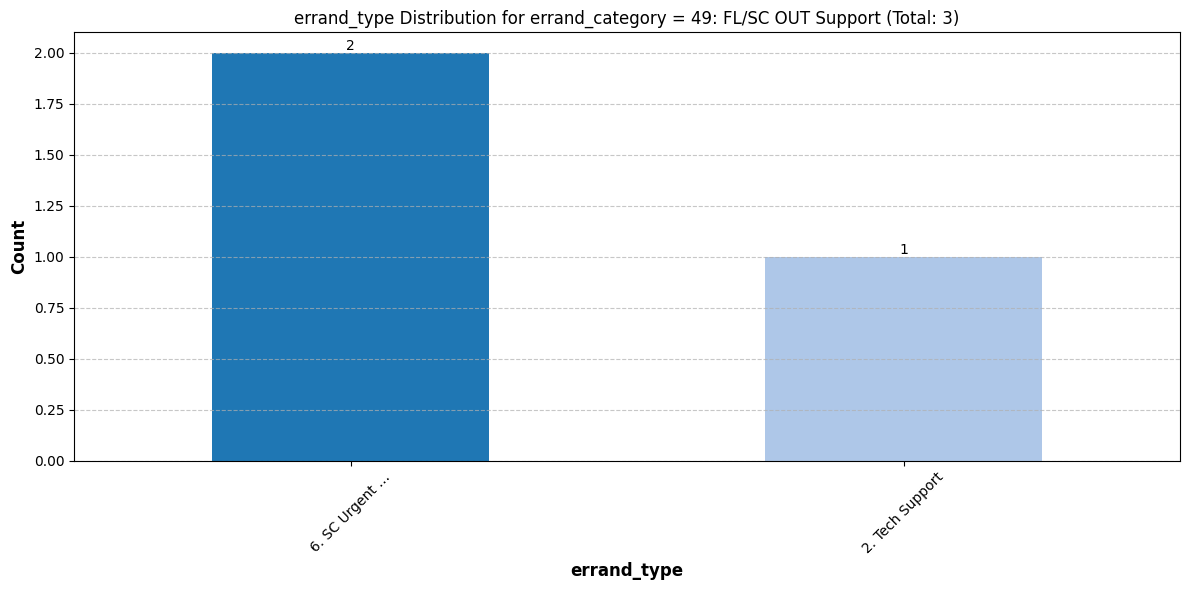

#### errand_category = 15: CT UPA

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category                    |   Count |   Ratio |
|:----------------------------|--------:|--------:|
| 6: Technical error - Ticket |       1 |       1 |



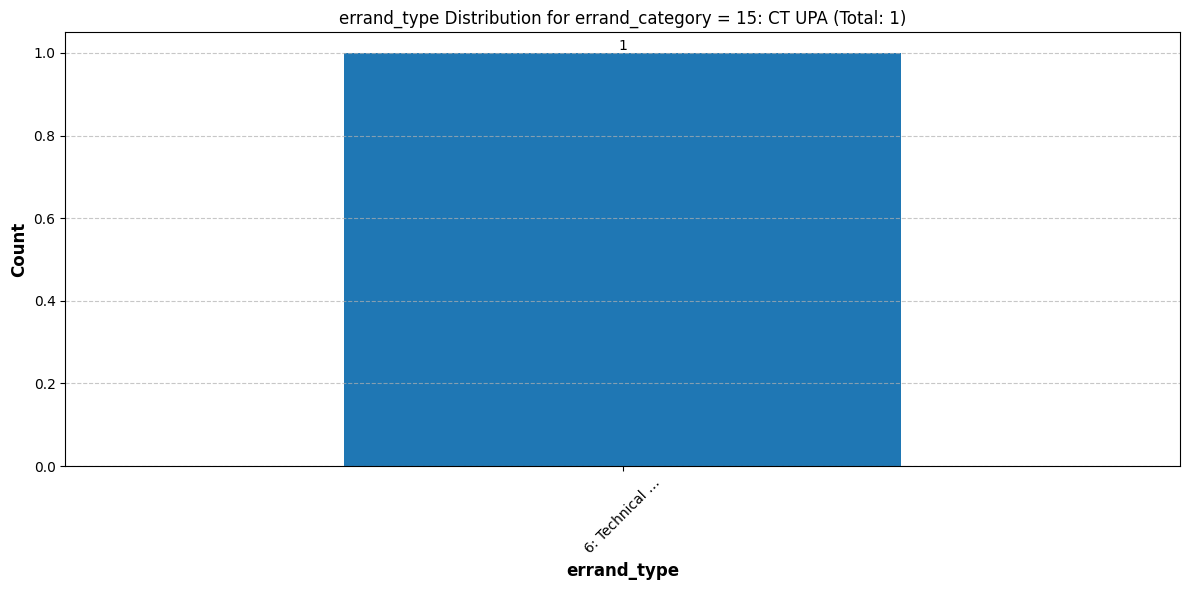

#### errand_category = 45: FL Coordinators

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category           |   Count |   Ratio |
|:-------------------|--------:|--------:|
| 1: FL Coordinators |       2 |       1 |



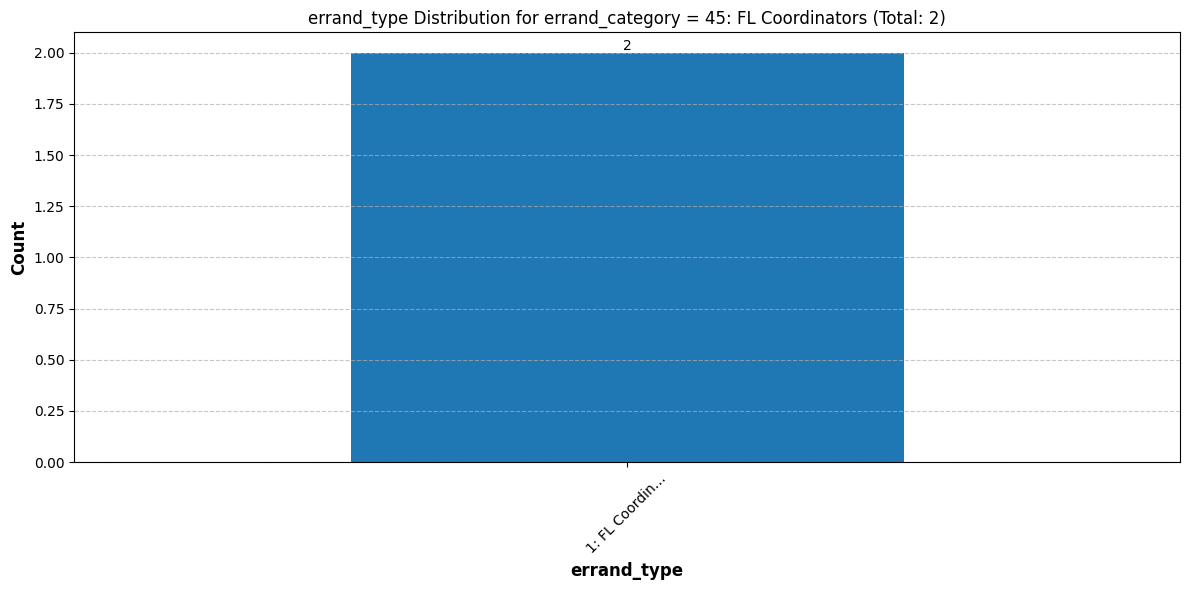

#### errand_category = 52: Privacy

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category   |   Count |   Ratio |
|:-----------|--------:|--------:|
| 1. Art. 16 |       3 |       1 |



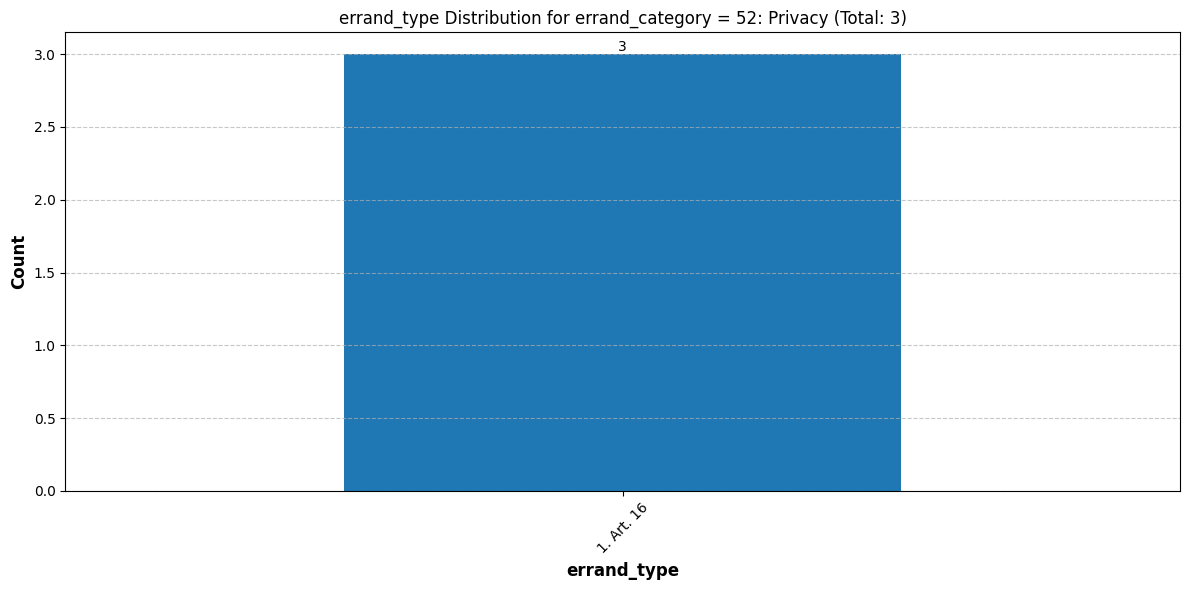

#### errand_category = 51. Backend FOP

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category               |   Count |   Ratio |
|:-----------------------|--------:|--------:|
| 1. VAN request handled |       4 |       1 |



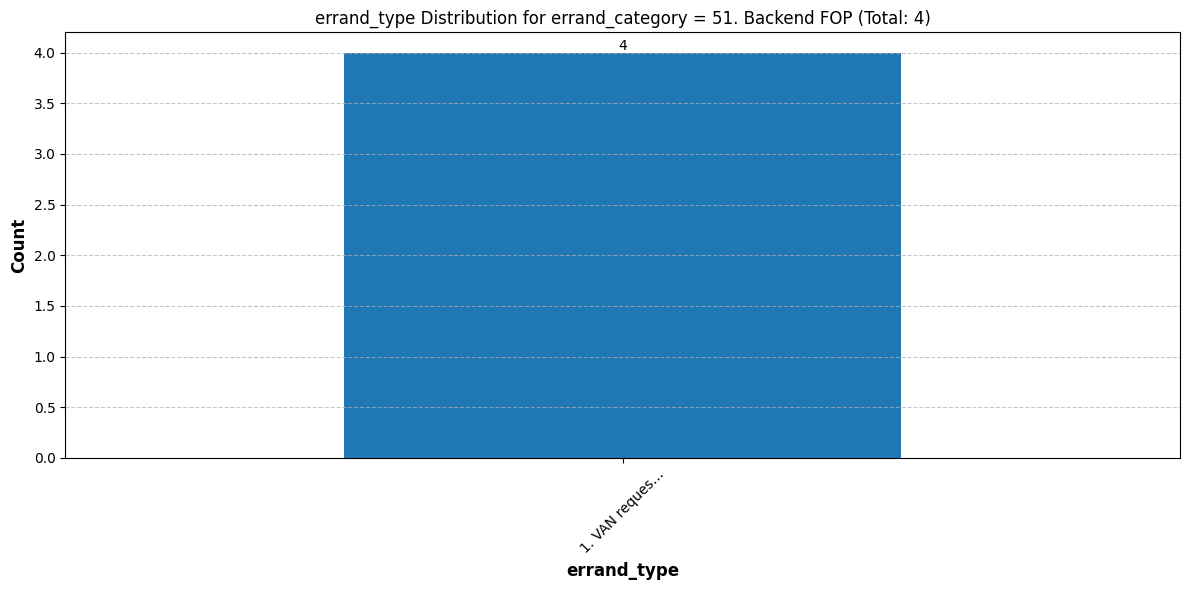

#### errand_category = 48: Strategic Partners Team

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category         |   Count |   Ratio |
|:-----------------|--------:|--------:|
| 13. Other Issues |       1 |       1 |



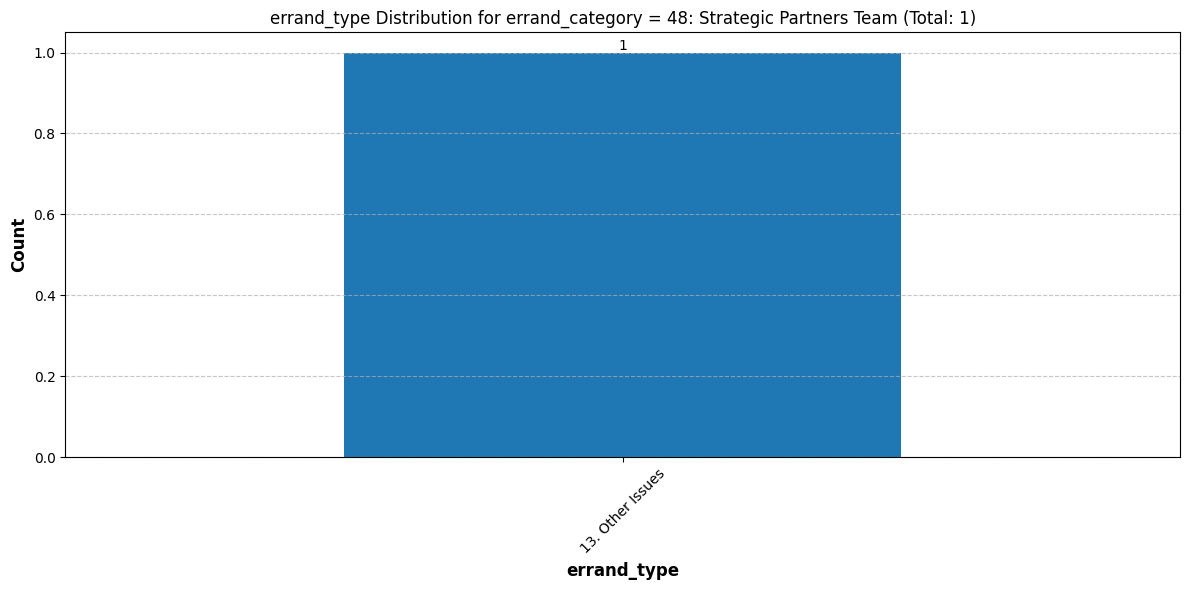

#### errand_category = 56: Fraud EAPI List ONLY

- **Unique Categories:** 1

- **Gini Coefficient:** 0.0

- **Top Categories (abs/rel):** 1 / 1.0



| Category       |   Count |   Ratio |
|:---------------|--------:|--------:|
| 1: Booking.com |       3 |       1 |



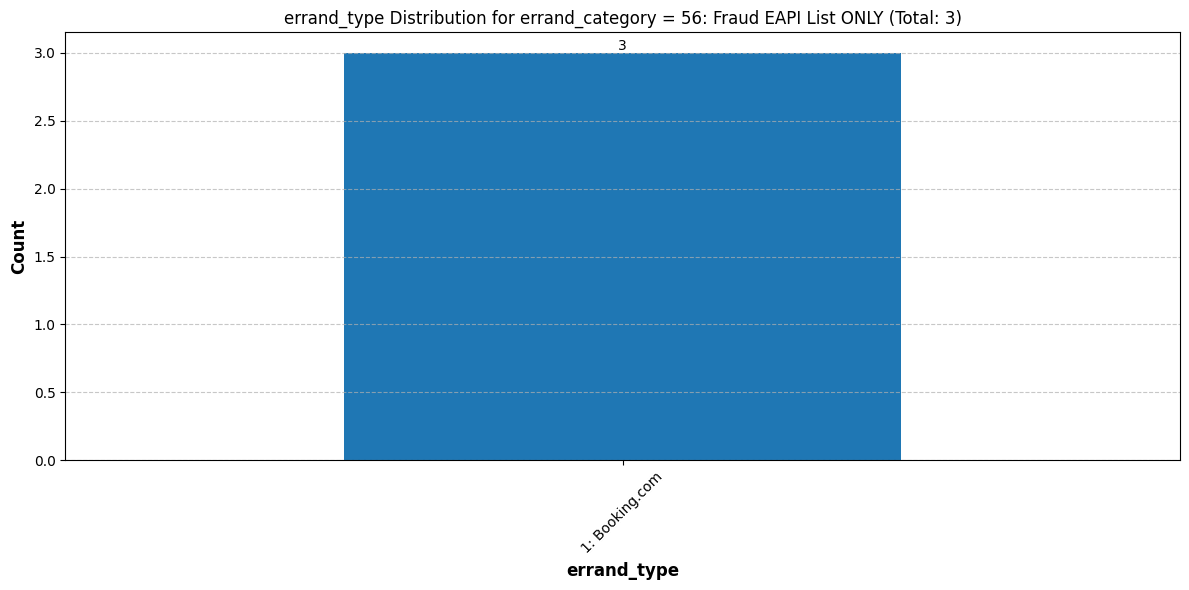

In [3]:
analysis.generate_df_analysis(
    errands_df,
    exclude_columns=["errand_id"],
    dependencies=[("errand_category", "errand_type")],
)

## Orders dataset

Initial observations:
- Booking Systems:
  - While there are over 300 booking systems recorded, the top four account for over 80% of all orders.
  - Some orders combine multiple booking systems, but it is unclear if the order of these combinations carries any significance.
- Brands:
  - Among the 13 brands, the top three account for nearly all orders, with the leading brand alone contributing to almost 60% of the total.
- Partners:
  - Similar to brands, the nearly 100 partners listed exhibit a skewed distribution, with the top three accounting for the vast majority of orders.
- Entry Types:
  - The top two entry types, "metasearch" and "B2B API," dominate, collectively representing almost all orders.
- Geographic and Currency Diversity:
  - Orders originate from a broad range of countries, with no single country or region significantly dominating. It takes 20 countries to account for 80% of the orders.
  - This geographic diversity is reflected in the variety of currencies used in transactions.
- Device Usage:
  - Nearly all access is via PCs or smartphones, with PCs accounting for nearly half of all orders.
- Journey Types:
  - As expected, almost all journeys are either one-way or round trips.

### Analysis

### Dataset Summary

- Total Rows: 6300206

- Total Columns: 22


| Column Name                | Type           | Excluded   | Dependent   |
|:---------------------------|:---------------|:-----------|:------------|
| order_id                   | int64          | True       | False       |
| pnr                        | object         | True       | False       |
| order_created_at           | datetime64[ns] | False      | False       |
| booking_system             | object         | False      | False       |
| site_country               | object         | False      | False       |
| brand                      | object         | False      | False       |
| order_amount               | float64        | False      | False       |
| currency                   | object         | False      | False       |
| revenue                    | float64        | False      | False       |
| partner                    | object         | False      | False       |
| customer_group_type        | object         | False      | False       |
| device                     | object         | False      | False       |
| client_entry_type          | object         | False      | False       |
| booking_system_source_type | object         | False      | False       |
| origin_country             | object         | False      | False       |
| destination_country        | object         | False      | False       |
| journey_type_id            | object         | False      | False       |
| is_changed                 | bool           | False      | False       |
| is_canceled                | bool           | False      | False       |
| cancel_reason              | object         | False      | False       |
| change_reason              | object         | False      | False       |
| count_errands              | int64          | False      | False       |

#### Numerical Summary

|                  |       count | mean                          | min                 | 25%                           | 50%                 | 75%                        | max                 |             std |
|:-----------------|------------:|:------------------------------|:--------------------|:------------------------------|:--------------------|:---------------------------|:--------------------|----------------:|
| order_created_at | 6.30021e+06 | 2024-02-14 18:54:33.344513280 | 2024-01-01 00:00:01 | 2024-01-23 15:28:24.249999872 | 2024-02-14 12:18:56 | 2024-03-07 11:28:08.500000 | 2024-04-01 00:00:00 |   nan           |
| order_amount     | 6.30021e+06 | 60256.938882463524            | -33.26              | 218.02                        | 547.99              | 1688.99                    | 450326679.65        |     1.14469e+06 |
| revenue          | 6.30021e+06 | 2506.439959114034             | -3160940.7          | 8.62                          | 15.22               | 46.06                      | 49072132.32         | 68244.1         |
| count_errands    | 6.30021e+06 | 0.4579685172199131            | 0.0                 | 0.0                           | 0.0                 | 0.0                        | 243.0               |     1.72801     |



[EDA1 2024-12-22 16:16:04,541] - Processing categorical column: booking_system


#### Column: booking_system

- **Unique Categories:** 331

- **Gini Coefficient:** 0.7982

- **Top Categories (abs/rel):** 4 / 0.0121



| Category                                     | Count   | Ratio   |
|:---------------------------------------------|:--------|:--------|
| System A                                     | 2017384 | 0.3202  |
| System D                                     | 1208324 | 0.1918  |
| System E                                     | 1114849 | 0.177   |
| System B                                     | 1040133 | 0.1651  |
| System C                                     | 364004  | 0.0578  |
| ...                                          | ...     | ...     |
| System A,System D,System E,System B,System C | 1       | 0.0     |
| System B,System C,System E,System A          | 1       | 0.0     |
| System G,System B,System D,System E          | 1       | 0.0     |
| System E,System D,System B,System C          | 1       | 0.0     |
| System D,System A,System C,System E          | 1       | 0.0     |



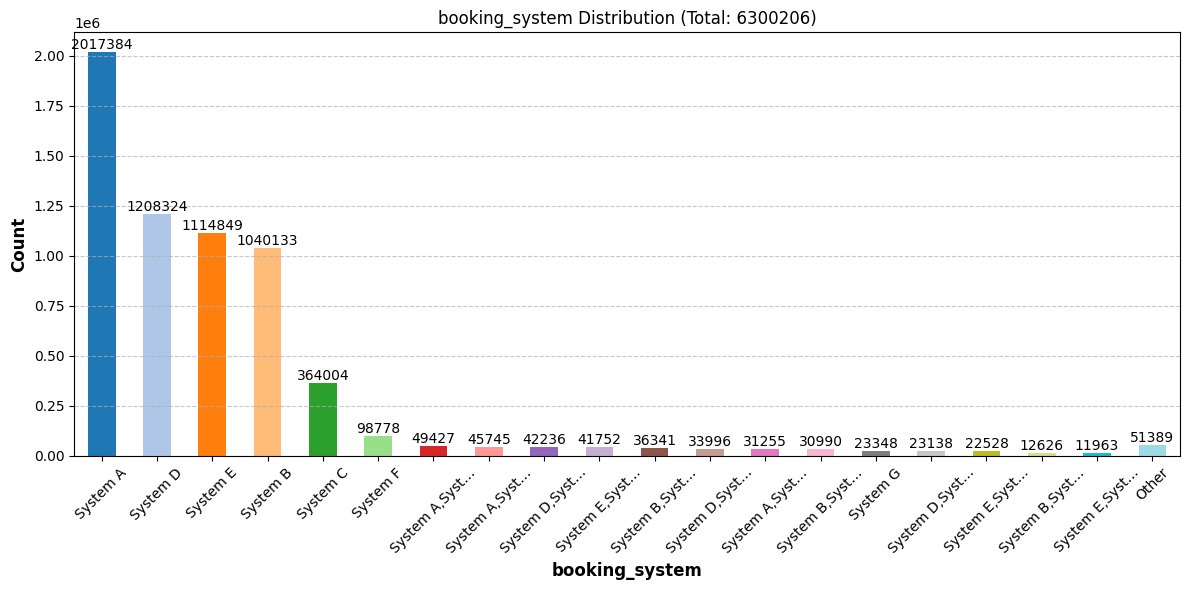

[EDA1 2024-12-22 16:16:06,852] - Processing categorical column: site_country


#### Column: site_country

- **Unique Categories:** 74

- **Gini Coefficient:** 0.945

- **Top Categories (abs/rel):** 20 / 0.2703



| Category       | Count   | Ratio   |
|:---------------|:--------|:--------|
| Germany        | 738300  | 0.1172  |
| United Kingdom | 693560  | 0.1101  |
| USA            | 566268  | 0.0899  |
| France         | 525612  | 0.0834  |
| Italy          | 311717  | 0.0495  |
| ...            | ...     | ...     |
| Uruguay        | 1180    | 0.0002  |
| Macau          | 654     | 0.0001  |
| Bolivia        | 361     | 0.0001  |
| Venezuela      | 247     | 0.0     |
| Paraguay       | 157     | 0.0     |



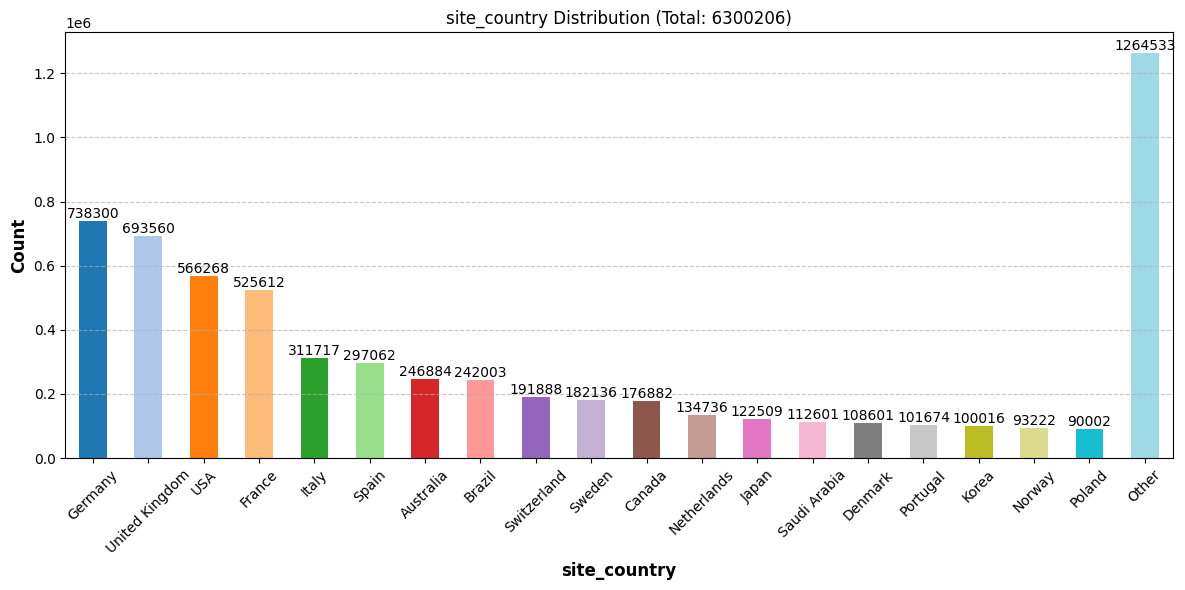

[EDA1 2024-12-22 16:16:08,940] - Processing categorical column: brand


#### Column: brand

- **Unique Categories:** 13

- **Gini Coefficient:** 0.6008

- **Top Categories (abs/rel):** 3 / 0.2308



| Category   | Count   | Ratio   |
|:-----------|:--------|:--------|
| Brand A    | 3708873 | 0.5887  |
| Brand B    | 1133975 | 0.18    |
| Brand D    | 840568  | 0.1334  |
| Brand C    | 214832  | 0.0341  |
| Brand E    | 190932  | 0.0303  |
| ...        | ...     | ...     |
| Brand J    | 1281    | 0.0002  |
| Brand K    | 964     | 0.0002  |
| Brand I    | 255     | 0.0     |
| Brand M    | 5       | 0.0     |
| Brand L    | 3       | 0.0     |



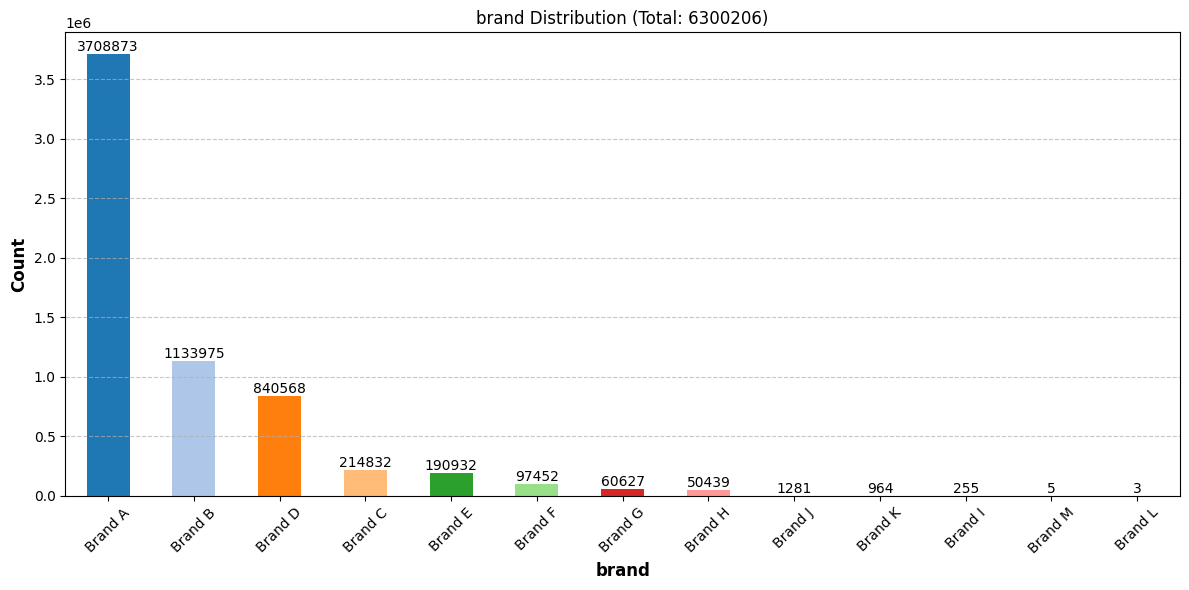

[EDA1 2024-12-22 16:16:10,808] - Processing categorical column: currency


#### Column: currency

- **Unique Categories:** 47

- **Gini Coefficient:** 0.8117

- **Top Categories (abs/rel):** 10 / 0.2128



| Category          | Count   | Ratio   |
|:------------------|:--------|:--------|
| Euro              | 2491752 | 0.3955  |
| Pound Sterling    | 693560  | 0.1101  |
| US Dollar         | 676846  | 0.1074  |
| Australian Dollar | 246884  | 0.0392  |
| Brazilian Real    | 242003  | 0.0384  |
| ...               | ...     | ...     |
| Rial Omani Oman   | 3972    | 0.0006  |
| Iceland Krona     | 3808    | 0.0006  |
| Jordanian Dinar   | 3742    | 0.0006  |
| Uzbekistan Som    | 2373    | 0.0004  |
| Peso Uruguayo     | 1180    | 0.0002  |



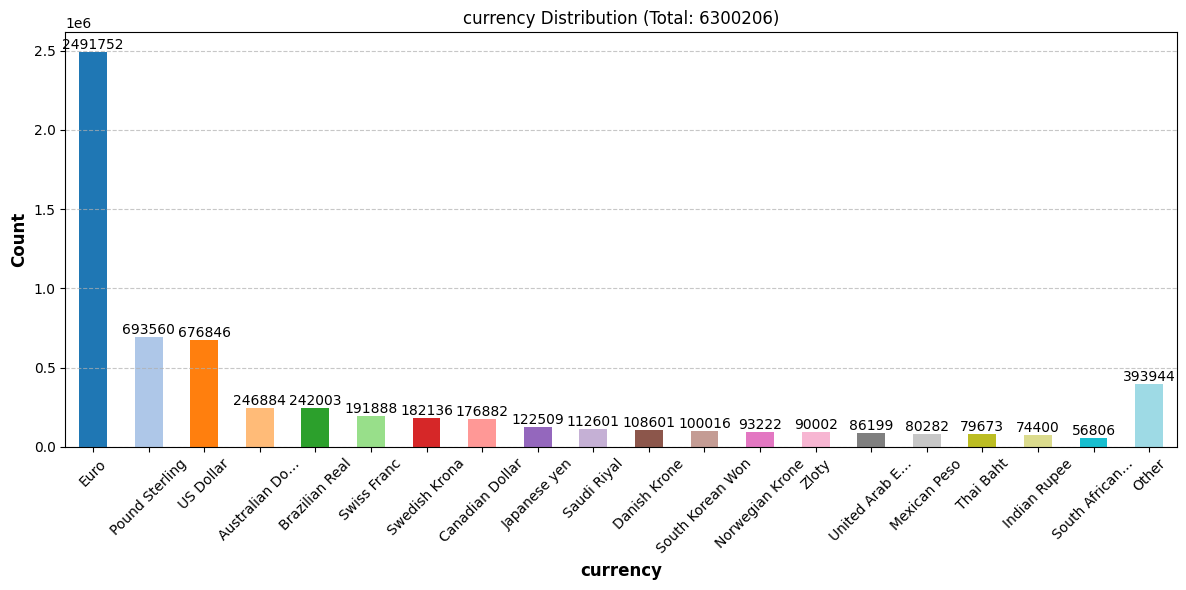

[EDA1 2024-12-22 16:16:12,840] - Processing categorical column: partner


#### Column: partner

- **Unique Categories:** 95

- **Gini Coefficient:** 0.7337

- **Top Categories (abs/rel):** 3 / 0.0316



| Category   | Count   | Ratio   |
|:-----------|:--------|:--------|
| Partner C  | 2389311 | 0.3792  |
| Partner A  | 1976093 | 0.3137  |
| Partner B  | 823156  | 0.1307  |
| Partner D  | 508695  | 0.0807  |
| Partner K  | 54633   | 0.0087  |
| ...        | ...     | ...     |
| Partner CM | 1       | 0.0     |
| Partner CN | 1       | 0.0     |
| Partner CO | 1       | 0.0     |
| Partner CP | 1       | 0.0     |
| Partner CQ | 1       | 0.0     |



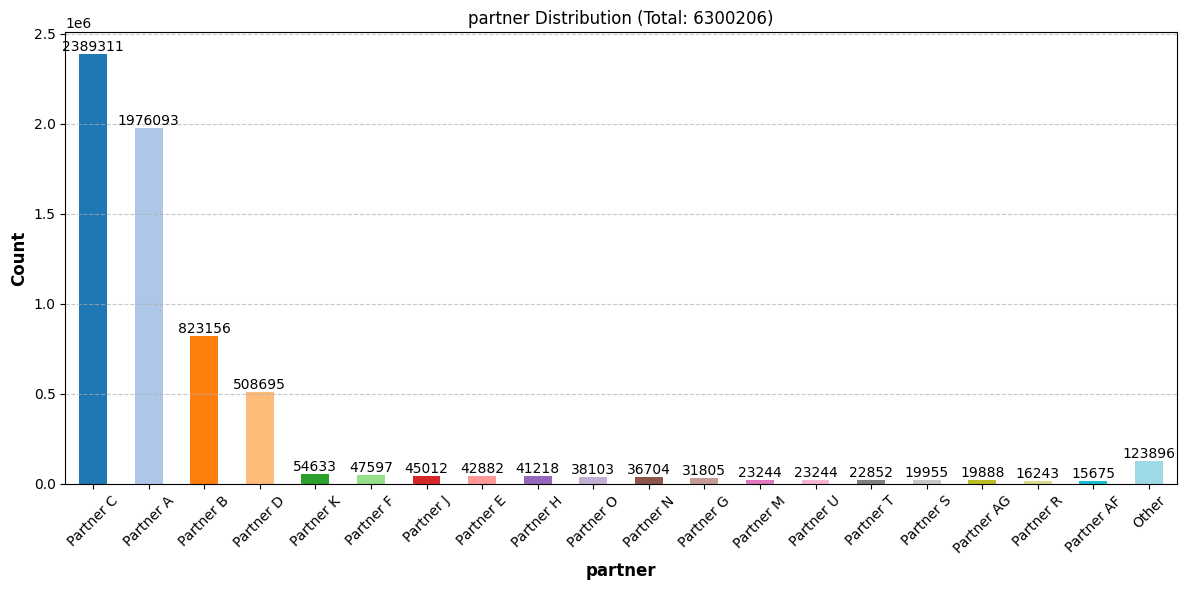

[EDA1 2024-12-22 16:16:14,711] - Processing categorical column: customer_group_type


#### Column: customer_group_type

- **Unique Categories:** 4

- **Gini Coefficient:** 0.5826

- **Top Categories (abs/rel):** 2 / 0.5



| Category   |   Count |   Ratio |
|:-----------|--------:|--------:|
| SINGLE     | 3645294 |  0.5786 |
| COUPLE     | 1655721 |  0.2628 |
| FAMILY     |  637471 |  0.1012 |
| GROUP      |  361720 |  0.0574 |



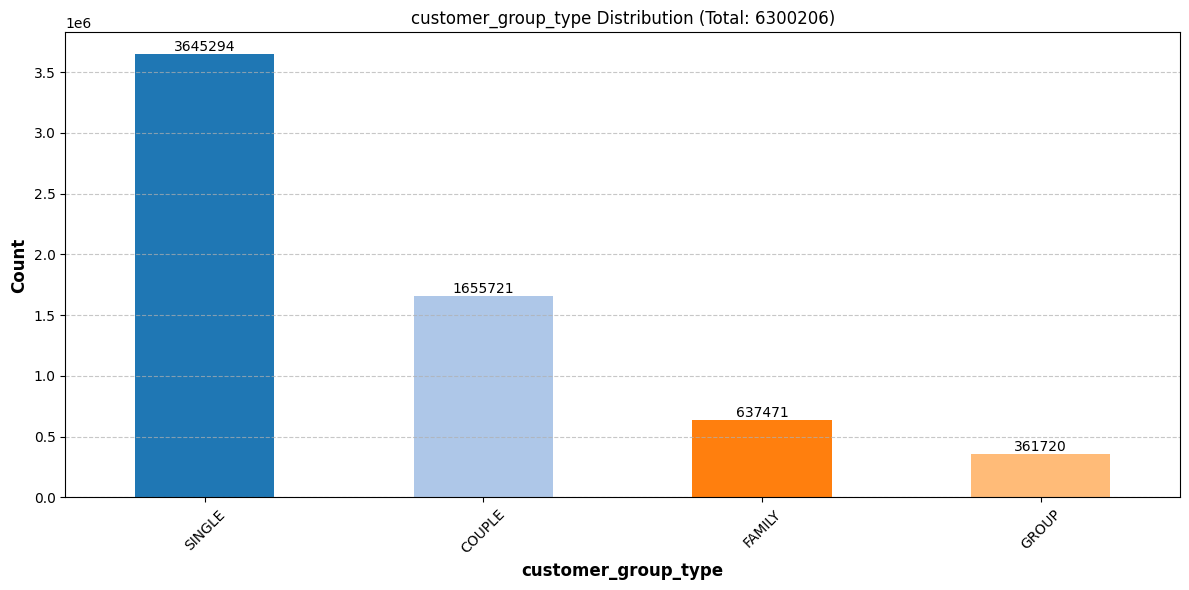

[EDA1 2024-12-22 16:16:16,284] - Processing categorical column: device


#### Column: device

- **Unique Categories:** 11

- **Gini Coefficient:** 0.6454

- **Top Categories (abs/rel):** 3 / 0.2727



| Category       |   Count |   Ratio |
|:---------------|--------:|--------:|
| PC             | 2853489 |  0.4529 |
| iPhone         | 2165298 |  0.3437 |
| Android Phone  | 1110813 |  0.1763 |
| iPad           |   67115 |  0.0107 |
| Android Tablet |   53784 |  0.0085 |
| Unknown        |   46641 |  0.0074 |
| AnonPhone      |    2991 |  0.0005 |
| BlackBerry     |      49 |  0      |
| AnonTablet     |      12 |  0      |
| iPod           |      12 |  0      |
| Application    |       2 |  0      |



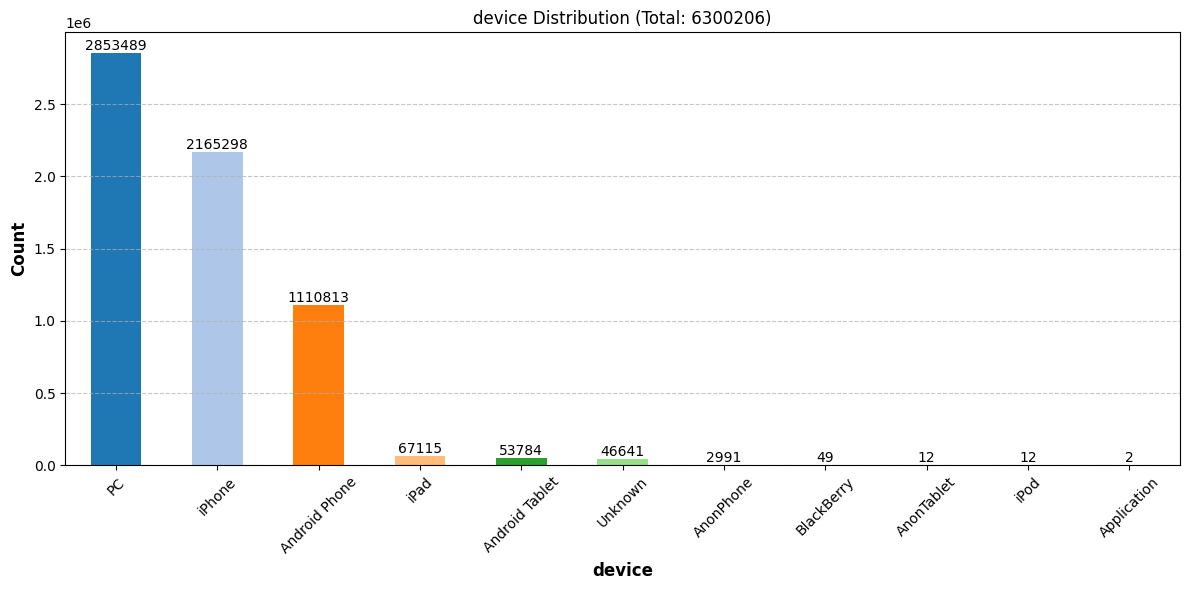

[EDA1 2024-12-22 16:16:18,132] - Processing categorical column: client_entry_type


#### Column: client_entry_type

- **Unique Categories:** 12

- **Gini Coefficient:** 0.4881

- **Top Categories (abs/rel):** 2 / 0.1667



| Category       | Count   | Ratio   |
|:---------------|:--------|:--------|
| metasearch     | 4048493 | 0.6426  |
| b2bapi         | 1977370 | 0.3139  |
| sponsoredlinks | 106889  | 0.017   |
| app            | 67788   | 0.0108  |
| undefined      | 47599   | 0.0076  |
| ...            | ...     | ...     |
| email          | 10400   | 0.0017  |
| newsletter     | 404     | 0.0001  |
| internal       | 50      | 0.0     |
| competition    | 12      | 0.0     |
| coupon         | 2       | 0.0     |



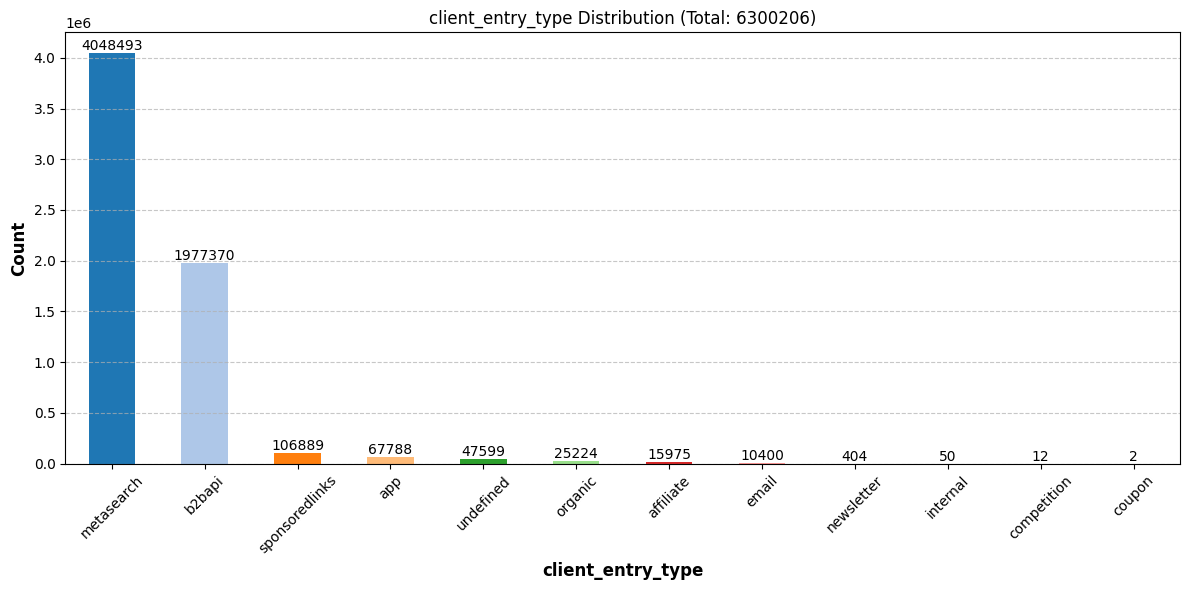

[EDA1 2024-12-22 16:16:20,053] - Processing categorical column: booking_system_source_type


#### Column: booking_system_source_type

- **Unique Categories:** 7

- **Gini Coefficient:** 0.6407

- **Top Categories (abs/rel):** 3 / 0.4286



| Category     |   Count |   Ratio |
|:-------------|--------:|--------:|
| GDS          | 3259014 |  0.5173 |
| API          | 1564873 |  0.2484 |
| NDC          |  994168 |  0.1578 |
| Web scrape   |  450204 |  0.0715 |
| Ticketless   |   27418 |  0.0044 |
| Consolidator |    3562 |  0.0006 |
| LCC          |     967 |  0.0002 |



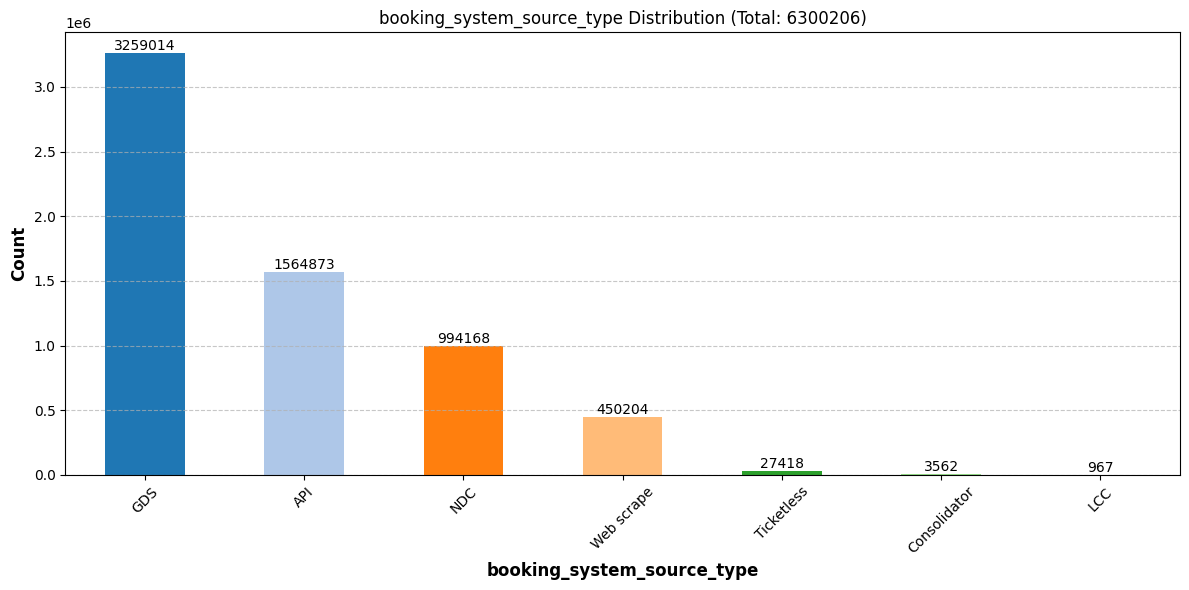

[EDA1 2024-12-22 16:16:21,876] - Processing categorical column: origin_country


#### Column: origin_country

- **Unique Categories:** 74

- **Gini Coefficient:** 0.945

- **Top Categories (abs/rel):** 20 / 0.2703



| Category       | Count   | Ratio   |
|:---------------|:--------|:--------|
| Germany        | 738300  | 0.1172  |
| United Kingdom | 693560  | 0.1101  |
| USA            | 566268  | 0.0899  |
| France         | 525612  | 0.0834  |
| Italy          | 311717  | 0.0495  |
| ...            | ...     | ...     |
| Uruguay        | 1180    | 0.0002  |
| Macau          | 654     | 0.0001  |
| Bolivia        | 361     | 0.0001  |
| Venezuela      | 247     | 0.0     |
| Paraguay       | 157     | 0.0     |



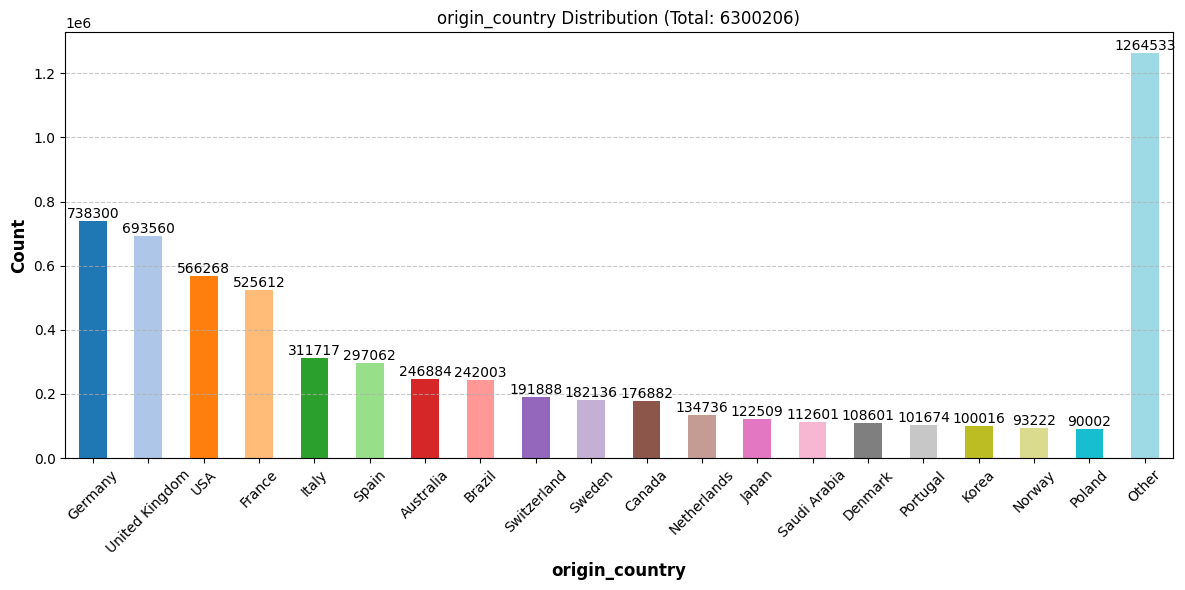

[EDA1 2024-12-22 16:16:23,987] - Processing categorical column: destination_country


#### Column: destination_country

- **Unique Categories:** 74

- **Gini Coefficient:** 0.945

- **Top Categories (abs/rel):** 20 / 0.2703



| Category       | Count   | Ratio   |
|:---------------|:--------|:--------|
| Germany        | 738300  | 0.1172  |
| United Kingdom | 693560  | 0.1101  |
| USA            | 566268  | 0.0899  |
| France         | 525612  | 0.0834  |
| Italy          | 311717  | 0.0495  |
| ...            | ...     | ...     |
| Uruguay        | 1180    | 0.0002  |
| Macau          | 654     | 0.0001  |
| Bolivia        | 361     | 0.0001  |
| Venezuela      | 247     | 0.0     |
| Paraguay       | 157     | 0.0     |



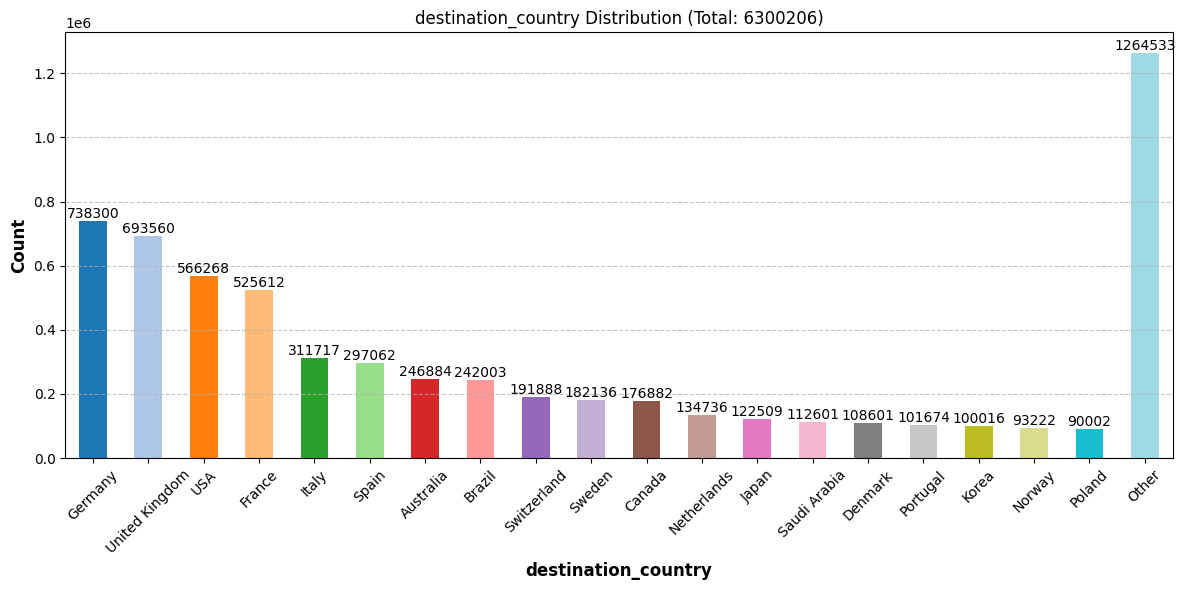

[EDA1 2024-12-22 16:16:26,025] - Processing categorical column: journey_type_id


#### Column: journey_type_id

- **Unique Categories:** 6

- **Gini Coefficient:** 0.4915

- **Top Categories (abs/rel):** 2 / 0.3333



| Category                 |   Count |   Ratio |
|:-------------------------|--------:|--------:|
| One-way                  | 3829653 |  0.6079 |
| Round-trip               | 2347358 |  0.3726 |
| OpenJawSingleOrigin      |   66131 |  0.0105 |
| MultiStop                |   29376 |  0.0047 |
| OpenJawSingleDestination |   24990 |  0.004  |
| OpenJawDouble            |    2698 |  0.0004 |



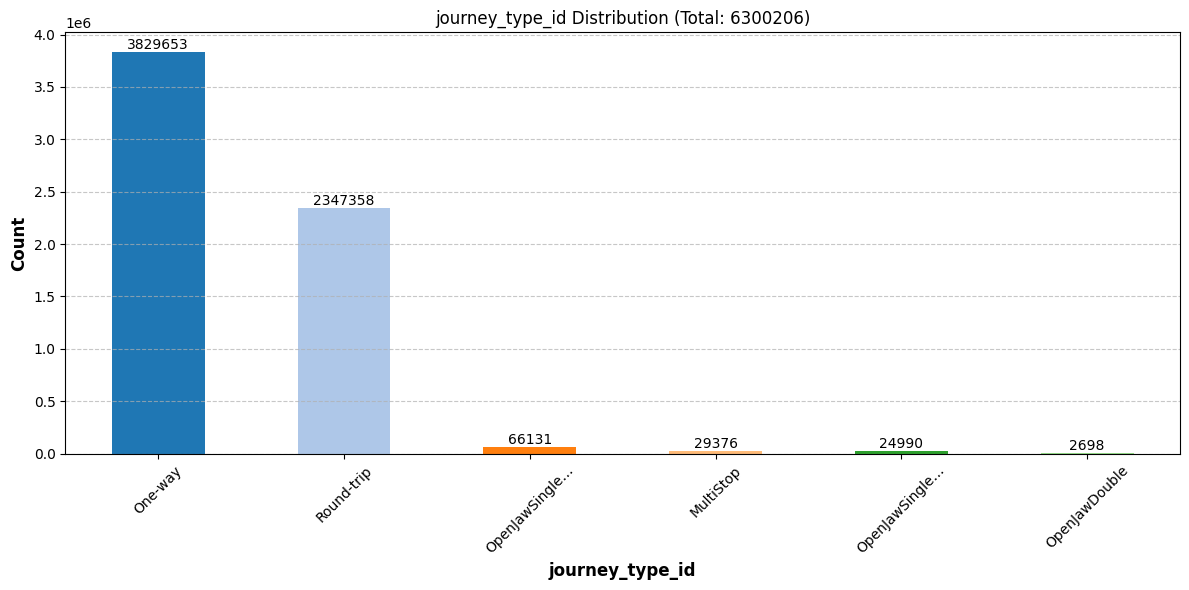

[EDA1 2024-12-22 16:16:28,407] - Processing categorical column: cancel_reason


#### Column: cancel_reason

- **Unique Categories:** 35

- **Gini Coefficient:** 0.0763

- **Top Categories (abs/rel):** 1 / 0.0286



| Category                         | Count   | Ratio   |
|:---------------------------------|:--------|:--------|
| Undefined                        | 6054263 | 0.961   |
| Void                             | 68123   | 0.0108  |
| Ticket rules - airline fee       | 44460   | 0.0071  |
| Schedule Change - refund         | 42460   | 0.0067  |
| Tech error - ticket              | 15507   | 0.0025  |
| ...                              | ...     | ...     |
| Chargeback- no refund            | 6       | 0.0     |
| CXL Guarantee - CC2C             | 1       | 0.0     |
| Ancillary - voluntary (not used) | 1       | 0.0     |
| Ancillary - voluntary            | 1       | 0.0     |
| JL Fare Issue                    | 1       | 0.0     |



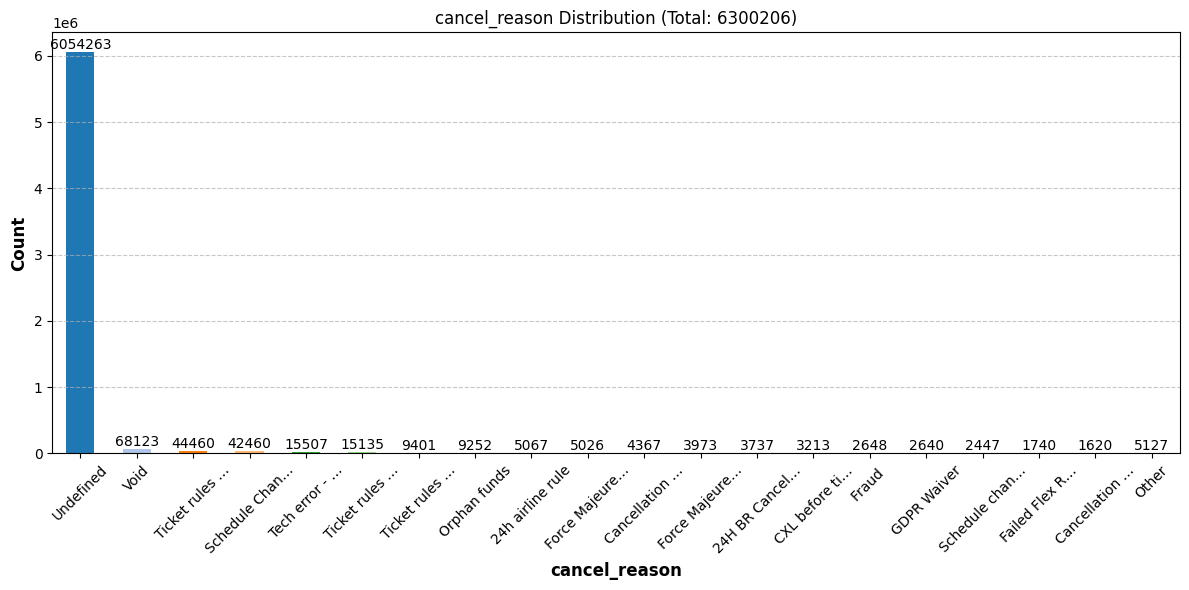

[EDA1 2024-12-22 16:16:30,387] - Processing categorical column: change_reason


#### Column: change_reason

- **Unique Categories:** 17

- **Gini Coefficient:** 0.1084

- **Top Categories (abs/rel):** 1 / 0.0588



| Category                             | Count   | Ratio   |
|:-------------------------------------|:--------|:--------|
| Initial - Not Changed                | 5945576 | 0.9437  |
| Schedule change: Primary Alternative | 175483  | 0.0279  |
| Cancel part of order                 | 90771   | 0.0144  |
| Against Ticket Rules - change        | 47855   | 0.0076  |
| Flexible ticket                      | 19234   | 0.0031  |
| ...                                  | ...     | ...     |
| Split PNR                            | 60      | 0.0     |
| COVID-19 Open ticket/voucher         | 54      | 0.0     |
| Infant booked                        | 19      | 0.0     |
| Bankruptcy - change                  | 3       | 0.0     |
| Optimization                         | 1       | 0.0     |



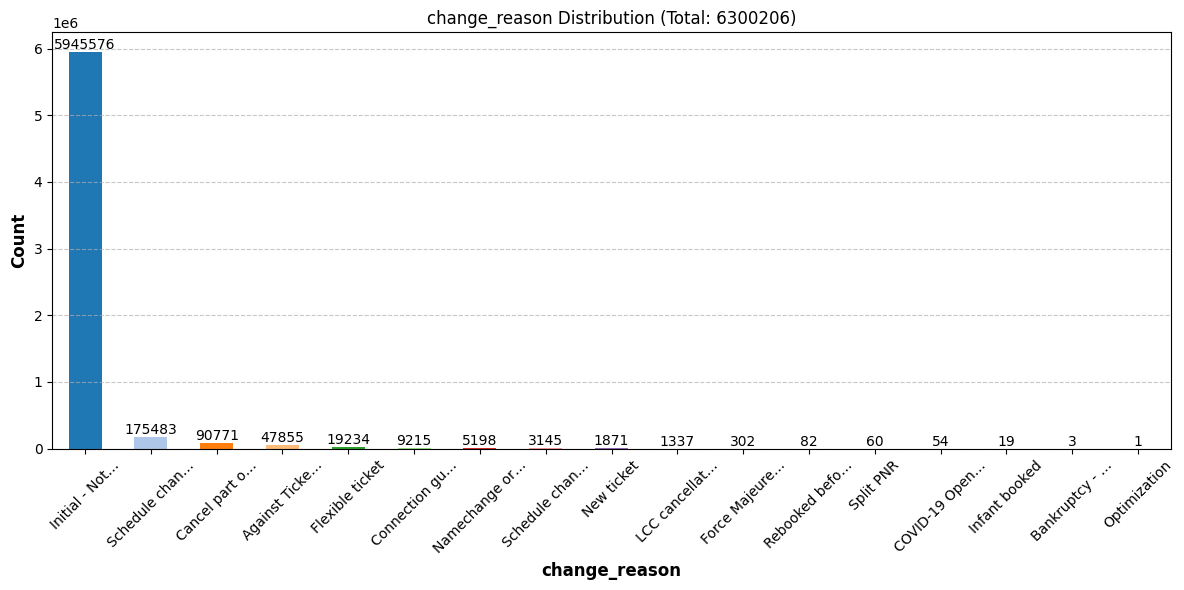

In [4]:
analysis.generate_df_analysis(
    orders_df,
    exclude_columns=["order_id", "pnr"],
)